# Week2授業課題2 富士下山問題

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# アニメーションのモジュール
import matplotlib.animation as animation
#jupyternotebook上でのアニメーション再生を有効にする
%matplotlib nbagg

In [2]:
csv_path = "mtfuji_data.csv" # ファイル名（パス）を指定する

np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

In [3]:
print(fuji[130:140])

[[  130.          35.352505   138.756638  2563.4      41888.      ]
 [  131.          35.35418    138.753742  2703.1      42210.      ]
 [  132.          35.355855   138.750846  2825.55     42532.      ]
 [  133.          35.35753    138.74795   2967.9      42854.      ]
 [  134.          35.359205   138.745054  3087.81     43177.      ]
 [  135.          35.36088    138.742157  3266.24     43499.      ]
 [  136.          35.362555   138.739261  3434.59     43821.      ]
 [  137.          35.36423    138.736364  3600.08     44143.      ]
 [  138.          35.365904   138.733468  3679.96     44466.      ]
 [  139.          35.367579   138.730571  3664.9      44788.      ]]


### 【問題1】データの可視化

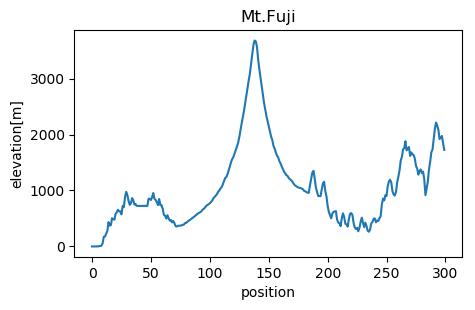

In [4]:
# 【問題1】データの可視化

plt.figure(figsize=(5, 3), dpi=100)
plt.title("Mt.Fuji") 
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.plot(fuji[:,0],fuji[:, 3]) 

plt.show()

### 【問題2】ある地点の勾配を計算する関数を作成
「二次元配列と勾配問題」では各地点での勾配を最初に求めました。しかし、暗闇の富士山を想像すると、知ることができるのは今いる地点の勾配だけです。  
「今いる地点の番号」と「今いる隣の地点の番号（今いる地点の番号-1）」の関係による勾配を求める関数を作成してください。  
勾配は以下の式で求まりましたが、このデータでは「標高」がy、「その地点の番号」がxに相当します。  

In [5]:
# 【問題2】ある地点の勾配を計算する関数を作成

def fuji_slope(x):
    # 変化量deltaを求める
    # 最初の地点の場合、ひとつ後の地点と比較する
    if x == fuji[:, 0].min():  
        delta =  fuji[x+1] - fuji[x]
    else:
        delta = fuji[x] - fuji[x-1]
    #print(delta)
    # 勾配slopeを求める
    slope = delta[3] / delta[0]
    return slope 

In [6]:
print(fuji_slope(131))

139.69999999999982


In [7]:
 2703.1-2563.4 

139.69999999999982

### 【問題3】移動先の地点を計算する関数を作成
今いる地点の勾配の情報を元に、次に移動先の地点を計算する関数を作成してください。  
数式で表すと 「移動先の地点 = 今いる地点 - 
α
 ×今いる地点の勾配」 となります。
「今いる地点の勾配」は問題2で作成した関数の返り値を使用してください。
α
 は0より大きい任意の値をとるハイパーパラメータです。機械学習の分野では学習率という名前で呼ばれます。この値によって下り方が変わります。ここでは例えば0.2に設定してください。
実装上の注意
上記式を計算すると移動先の地点には浮動小数点数が現れますが、今回勾配の情報を得るためには地点は整数で表す必要があります。そのため、四捨五入による変換を行ってください。また、取り柄ない値となった場合の処理が必要です。例えば移動先の地点が負になると、そのようなデータが存在しないため、次に勾配が得られなくなります。
ハイパーパラメータとは
機械学習手法において、その手法自身では最適化が行えない値のことです。値によって手法の挙動は変化し、学習がうまくいくかどうかに影響を与えるため、設定は慎重に行う必要があります。最も単純には人間が考えて設定することになりますが、ハイパーパラメータを機械的に決めるための手法も存在します。

In [8]:
# 【問題3】移動先の地点を計算する関数を作成
# 移動先の地点 = 今いる地点 - α ×今いる地点の勾配

def where_go(x, a=0.2):
    """
        移動先の地点 = 今いる地点 - α ×今いる地点の勾配
    """
    from decimal import Decimal, ROUND_HALF_UP
    where_next_pre = x - a*fuji_slope(x)
    if where_next_pre > fuji[:, 0].max():  # 地点番号が最大値を超えたら最大値にする
        where_next = int(fuji[:, 0].max())
    elif where_next_pre < fuji[:, 0].min():  # 地点番号が最小値より低かったら最小値にする
        where_next = int(fuji[:, 0].min())
    else:
        # roundより正確に丸める
        where_next = int(Decimal(str(where_next_pre)).quantize(Decimal('1.'), rounding=ROUND_HALF_UP))
    return where_next

In [9]:
print(where_go(131))

103


In [10]:
# test
131 - 0.2 *139.69999999999982

103.06000000000003

#### 丸め方の確認

In [11]:
round(0.5)

0

In [12]:
round(0.9)

1

In [13]:
round(2.5)

2

In [14]:
round(1.5)

2

In [15]:
from decimal import Decimal, ROUND_HALF_UP
Decimal(str(1.5)).quantize(Decimal('1.'), rounding=ROUND_HALF_UP)

Decimal('2')

#### 【問題4】山を下る関数を作成
山を下る関数を作成してください。最初の地点を受け取り、問題3の関数によって地点を更新していきます。移動毎の地点はリストなどに記録して、これを関数の返り値としてください。
最初の「今いる地点」は富士山の頂上付近、136番の地点（標高3434.59[m]）とします。ここから山を下っていきましょう。
実装上の注意
問題3で四捨五入を行っているため、移動先の地点が今いる地点と同じ場合になることがあります。移動量が減ってきたということなので、その時点で山を下りきったと判断してください。実際の勾配降下法ではこのようなことは起きません。

In [16]:
#【問題4】山を下る関数を作成
# 山下さんと合作

def going_down(x=136, a=0.2):
    # 今いる地点
    where_now = np.array([x])
    # 移動先 最初
    where_next = where_go(where_now[-1], a)
    
    # 移動地点が同じ場合、繰り返しをやめる
    while True:
        if where_next in where_now:
               break
        #print(where_next)
        where_now = np.hstack((where_now , np.array(where_next)))
        where_next = where_go(where_now[-1], a)

    
    return where_now

In [17]:
# test
print(going_down())

[136 102  98  95  93  89  85  82  79  73  70  78  77  75]


In [18]:
# test
print(going_down(75))

[75]


In [19]:
print("地点136から山を下った場合のルート:{}".format(going_down()))

地点136から山を下った場合のルート:[136 102  98  95  93  89  85  82  79  73  70  78  77  75]


#### 要修正コード

In [20]:
# 修正前　案１
# 地点139でエラーになる

def cut_oscillation(where_now):
    if len(where_now) > 2 and where_now[-1] == where_now[-3]:
        return cut_oscillation(where_now[:-1])
    else:
        return where_now

def go_home(x=136):
    # 今いる地点
    where_now_pre = np.array([x])
    # 移動先 最初は存在しない地点を入れる
    where_next = -1
    
    # 移動地点が同じ場合、繰り返しをやめる
    while len(where_now_pre) < 2 or where_now_pre[-2] != where_next:
        if len(where_now_pre) >= 4 and where_now_pre[-4] == where_next:  # 振動対策　前の前の地点と次の地点が同じ場合繰り返しを終了
            break
        
        where_next = where_go(where_now_pre[-1])
        #print(where_next)
        where_now_pre = np.hstack((where_now_pre, np.array(where_next))) # 配列の最後に加える
        #print(where_now_pre_1)
    
    # 繰り返し終了後
    # 振動していた箇所を除く
    if len(where_now_pre) >2:
        where_now =cut_oscillation(where_now_pre[:-1])
    else:
        where_now = where_now_pre[:-1]
    
    return where_now

In [21]:
# test
where_now_pre_1 = np.array([0, 1, 2, 3, 4, 5, 6, 5, 6, 5, 2, 5, 2, 5, 2, 5, 2, 5])
cut_oscillation(where_now_pre_1)

array([0, 1, 2, 3, 4, 5, 6, 5, 6, 5, 2])

In [22]:
# test
where_now_pre_1 = np.array([5, 2, 5])
cut_oscillation(where_now_pre_1)

array([5, 2])

In [23]:
print("地点136から山を下った場合のルート:{}".format(go_home()))

地点136から山を下った場合のルート:[136 102  98  95  93  89  85  82  79  73  70  78  77  75]


#### 【問題5】下山過程の可視化
問題4における下山過程をMatplotlibを使いグラフで可視化してください。  
可視化例  
・断面図の中に移動した地点を点で表示する  
・繰り返し毎の標高や勾配を折れ線グラフにする  

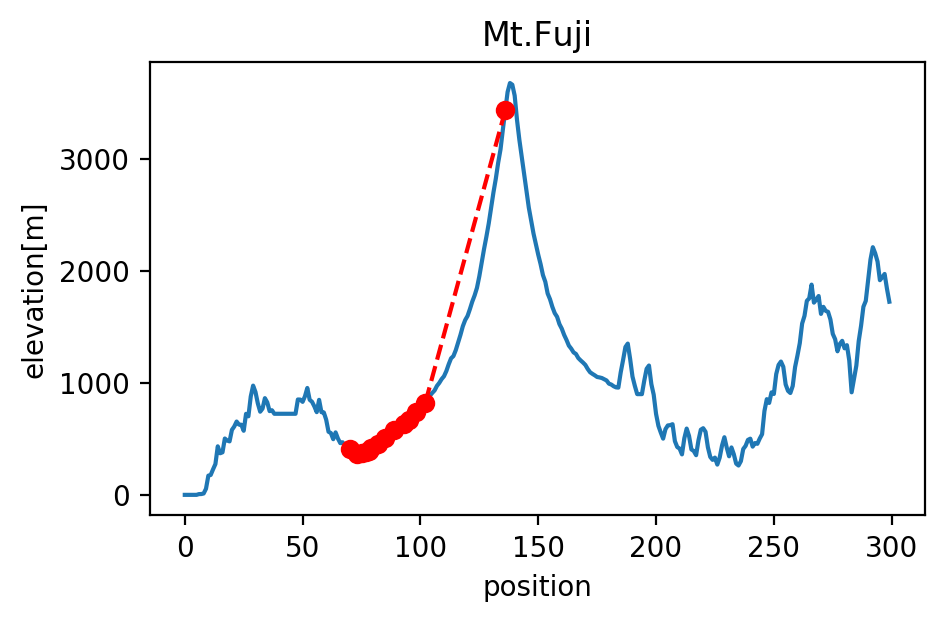

In [24]:
# 【問題5】下山過程の可視化

position_x = going_down()
position_y = np.array([fuji[x, 3] for x in position_x])

plt.figure(figsize=(5, 3), dpi=200)
plt.title("Mt.Fuji") 
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.plot(fuji[:,0],fuji[:, 3]) 
plt.plot(position_x, position_y,  "o--r") 
# plt.scatter(position_x, position_y, color="red") 

plt.show()

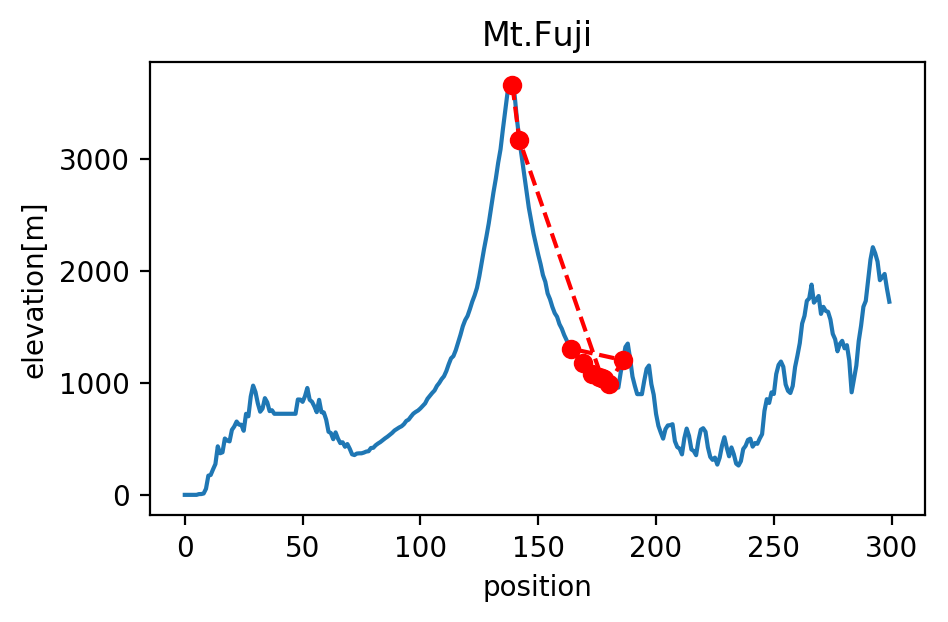

In [25]:
# 地点139のテスト
position_x = going_down(139)
position_y = np.array([fuji[x, 3] for x in position_x])

plt.figure(figsize=(5, 3), dpi=200)
plt.title("Mt.Fuji") 
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.plot(fuji[:,0],fuji[:, 3]) 
plt.plot(position_x, position_y,  "o--r") 
# plt.scatter(position_x, position_y, color="red") 

plt.show()

#### 【問題6】初期値の変更
問題4では最初の「今いる地点」を136としましたが、これを他の全ての点で計算してください。そして、いくつかの初期値に対してどのような下山過程となるか、問題5のように可視化してください。機械学習においては 初期値 をどう設定するかが結果に影響を与えることが確認できます。  
初期値とは  
今回の例での最初の地点のような値を初期値と呼びます。これを変更すると結果が変化します。例えば136と142では富士山の異なるの斜面を下ることになります。  

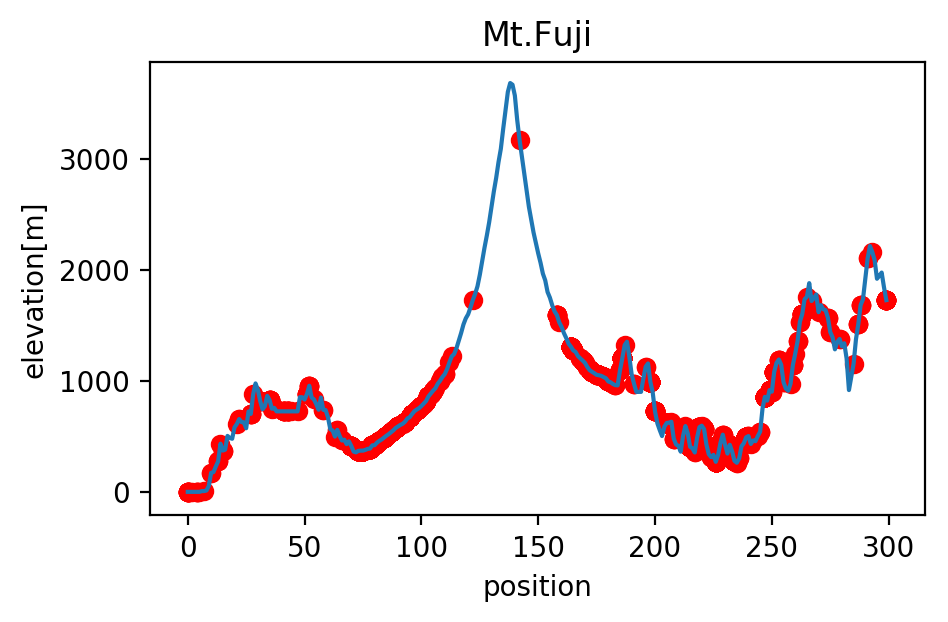

In [26]:
plt.figure(figsize=(5, 3), dpi=200)
plt.title("Mt.Fuji") 
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.plot(fuji[:,0],fuji[:, 3]) 

for i in fuji[:,0]:
    #print(i)
    position_x = going_down(int(i))[1:]
    position_y = np.array([fuji[x, 3] for x in position_x])
    plt.scatter(position_x, position_y, color="red") 
    
#plt.plot(position_x, position_y,  "o--r") 
plt.show()

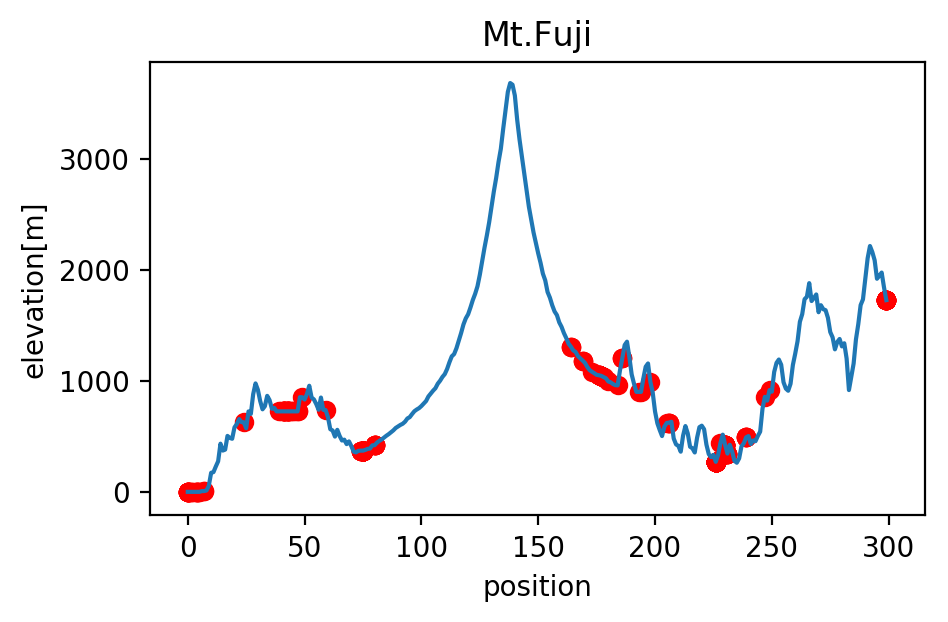

In [27]:
# 最終到達地点のみプロット→ヒストグラムに出したい
plt.figure(figsize=(5, 3), dpi=200)
plt.title("Mt.Fuji") 
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.plot(fuji[:,0],fuji[:, 3]) 

for i in fuji[:,0]:
    #print(i)
    position_x = [going_down(int(i))[-1]]
    position_y = np.array([fuji[x, 3] for x in position_x])
    plt.scatter(position_x, position_y, color="red") 
    
#plt.plot(position_x, position_y,  "o--r") 
plt.show()

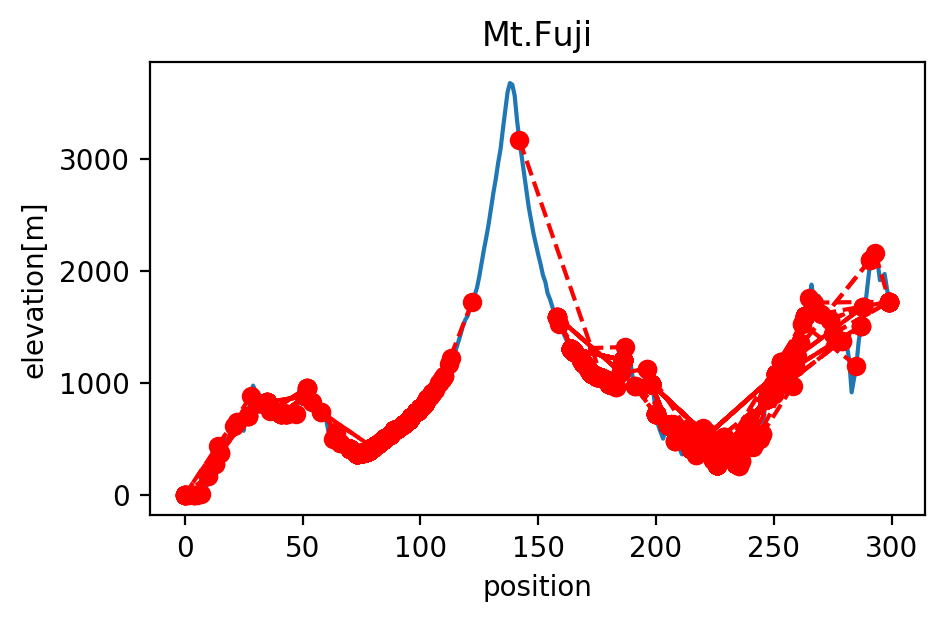

In [28]:
# 点と破線で表示
plt.figure(figsize=(5, 3), dpi=200)
plt.title("Mt.Fuji") 
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.plot(fuji[:,0],fuji[:, 3]) 

for i in fuji[:,0]:
    #print(i)
    position_x = going_down(int(i))[1:]
    position_y = np.array([fuji[x, 3] for x in position_x])
    plt.plot(position_x, position_y,  "o--r") 
    
#plt.plot(position_x, position_y,  "o--r") 
plt.show()

#### アニメーションにしてみた
+がスタート地点、xが到達地点である。

<IPython.core.display.Javascript object>


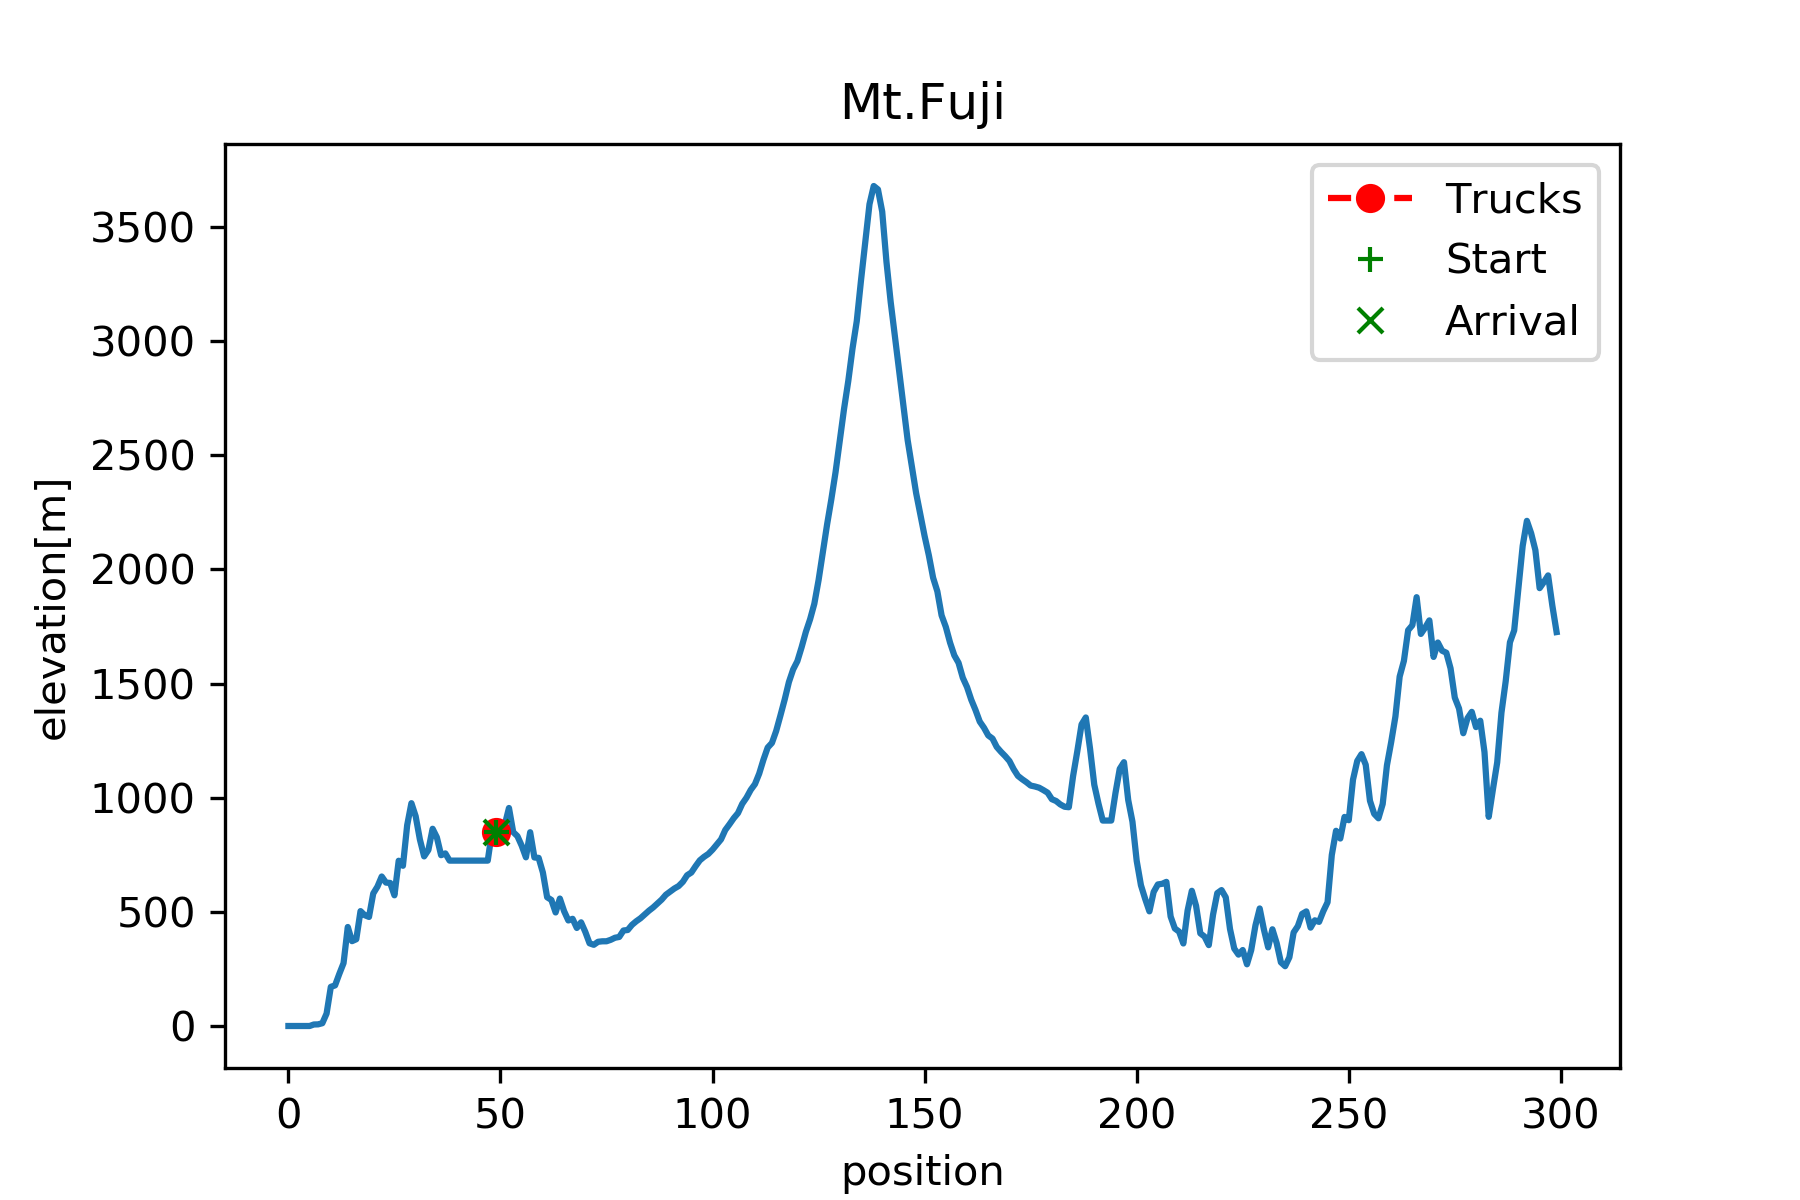

In [29]:
# これをここに入れないと再生されないことがある気がする
%matplotlib nbagg

fig = plt.figure(figsize=(6, 4), dpi=150)

ims = []
# 山
plt.title("Mt.Fuji") 
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.plot(fuji[:,0],fuji[:, 3]) 
flag_legend = True#凡例描画のフラグ

for i in fuji[:,0]:
    #print(i)
    position_x = going_down(int(i))
    position_y = np.array([fuji[x, 3] for x in position_x])
    im1 = plt.plot(position_x, position_y,  "o--r", label = "Trucks")  # グラフにする
    im2 = plt.plot(position_x[0], position_y[0],  "+g", label = "Start")
    im3 = plt.plot(position_x[-1], position_y[-1],  "xg", label = "Arrival")
    if flag_legend:#一回のみ凡例を描画
        plt.legend()
        flag_legend = False
    ims.append(im1+im2+im3)#グラフを配列に追加

# 10枚のプロットを 100ms ごとに表示
ani = animation.ArtistAnimation(fig, ims, interval=100)
plt.show()

#### 【問題7】（アドバンス問題）ハイパーパラメータの変更
ハイパーパラメータ$ α $を変化させるとどのような下山過程となるか、問題5のように可視化してください。そして、ハイパーパラメータにより結果が大きく異なることを確認してください

Traceback (most recent call last):
  File "/Users/ryuji_sato/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 387, in process
    proxy(*args, **kwargs)
  File "/Users/ryuji_sato/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 227, in __call__
    return mtd(*args, **kwargs)
  File "/Users/ryuji_sato/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/animation.py", line 1499, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


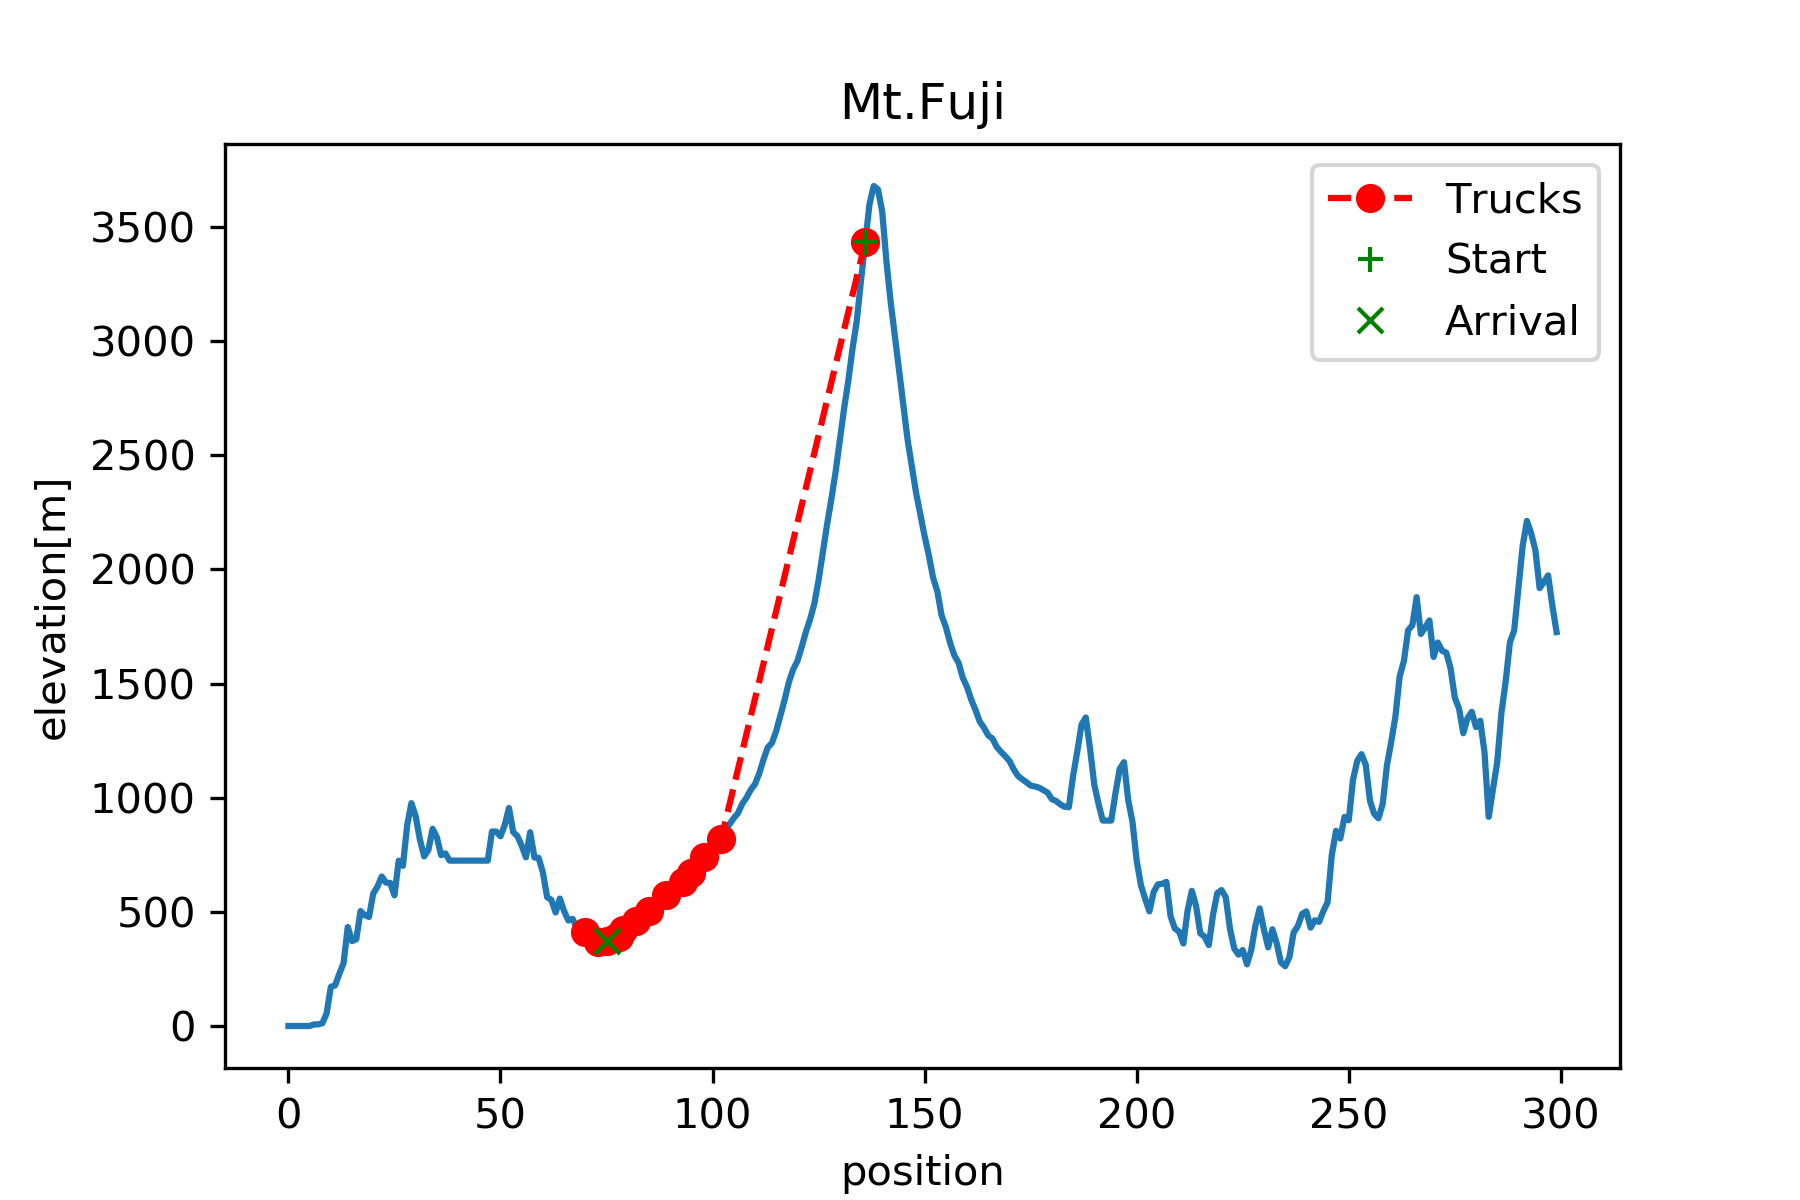

alpha:0.1 地点:[136 119 113 108 105 102 100  98  96  93  91  90  89  87  85  83  82  80]
alpha:0.2 地点:[136 102  98  95  93  89  85  82  79  73  70  78  77  75]
alpha:0.3 地点:[136  85  80  79  71  86  82  77  74  73  69  62  66  78]
alpha:0.4 地点:[136  69  59  60  86  80  79  68  84  77  73]
alpha:0.5 地点:[136  52  15  46]
alpha:0.6 地点:[136  35  58 124  83  75]
alpha:0.7 地点:[136  18  31 103  74  73  64  21   0]
alpha:0.8 地点:[136   1]
alpha:0.9 地点:[136   0]


In [30]:
alpha = np.arange(0.1, 1.0, 0.1)# 0.1から0.9まで、0.1刻みの配列

# これ入れないとちゃんと動かないことがある気がする
%matplotlib nbagg

fig = plt.figure(figsize=(6, 4), dpi=150)

ims = []
# 山
plt.title("Mt.Fuji") 
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.plot(fuji[:,0],fuji[:, 3]) 
flag_legend = True#凡例描画のフラグ
for a in alpha:
    # 各地点で実行すると重すぎる
    #for i in fuji[:,0]:
    #print(i)
    #position_x = going_down(int(i), a)
    #地点136に固定
    position_x = going_down(int(136),a)
    position_y = np.array([fuji[x, 3] for x in position_x])
    im1 = plt.plot(position_x, position_y,  "o--r", label = "Trucks")  # グラフにする
    im2 = plt.plot(position_x[0], position_y[0],  "+g", label = "Start")
    im3 = plt.plot(position_x[-1], position_y[-1],  "xg", label = "Arrival")
    if flag_legend:#一回のみ凡例を描画
        plt.legend()
        flag_legend = False
    ims.append(im1+im2+im3)#グラフを配列に追加
    print("alpha:{0:.1f} 地点:{1}".format(a, position_x))

# 10枚のプロットを 1000ms ごとに表示
ani = animation.ArtistAnimation(fig, ims, interval=1000)

plt.show()

グラフの中に$ α $の値や到達地点を表示させたかったが、上手く出来なかった。  
Matplotlibのオブジェクトやメソッドに関する理解が不足している。  

#### alphaが0.01の場合

スタート地点を除いた通過しうる点

<IPython.core.display.Javascript object>


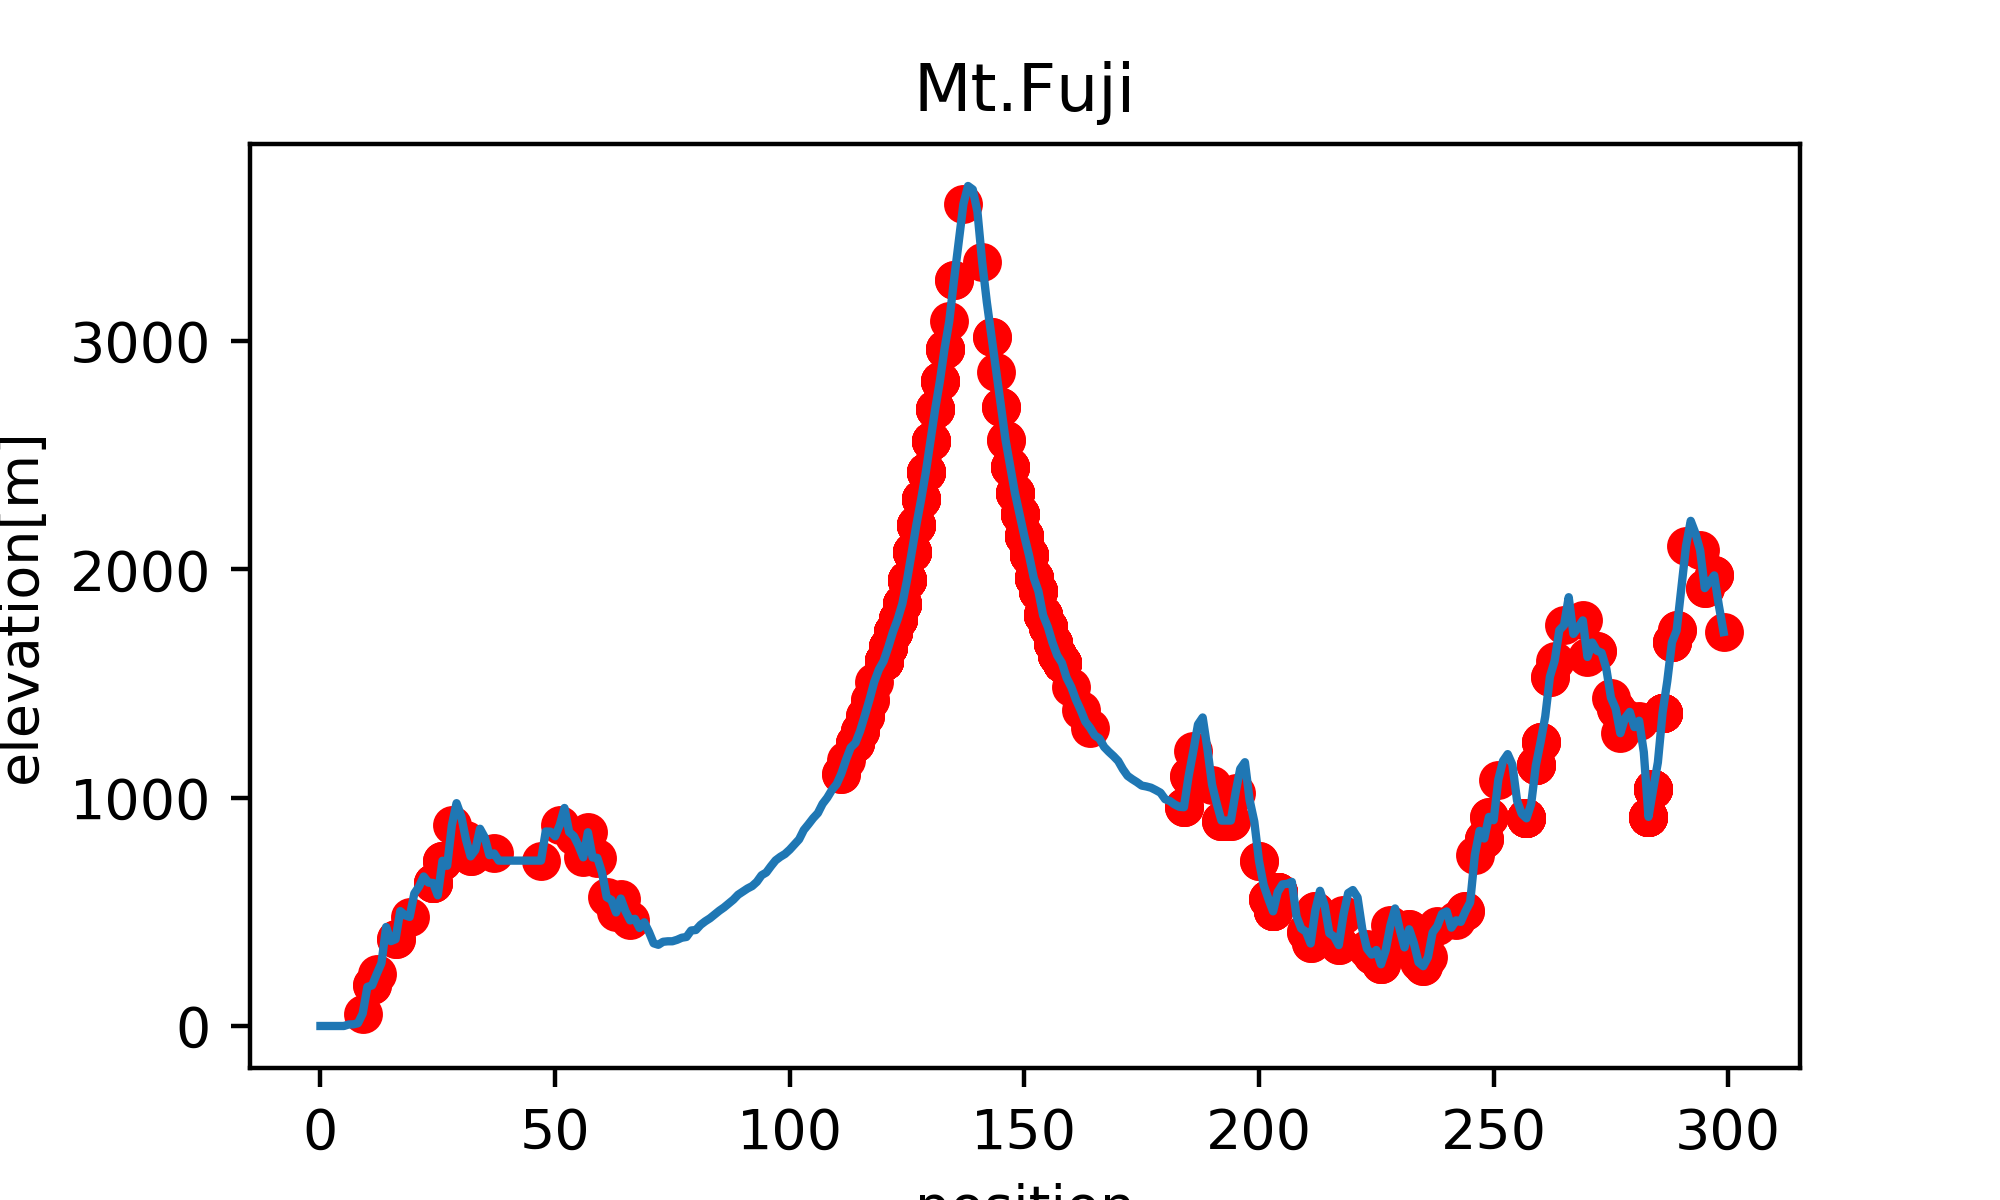

In [31]:
# alphaが0.01の場合
plt.figure(figsize=(5, 3), dpi=200)
plt.title("Mt.Fuji") 
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.plot(fuji[:,0],fuji[:, 3]) 

for i in fuji[:,0]:
    #print(i)
    position_x = going_down(int(i),0.01)[1:]
    position_y = np.array([fuji[x, 3] for x in position_x])
    plt.scatter(position_x, position_y, color="red") 
    
#plt.plot(position_x, position_y,  "o--r") 
plt.show()

Traceback (most recent call last):
  File "/Users/ryuji_sato/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 387, in process
    proxy(*args, **kwargs)
  File "/Users/ryuji_sato/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 227, in __call__
    return mtd(*args, **kwargs)
  File "/Users/ryuji_sato/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/animation.py", line 1499, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


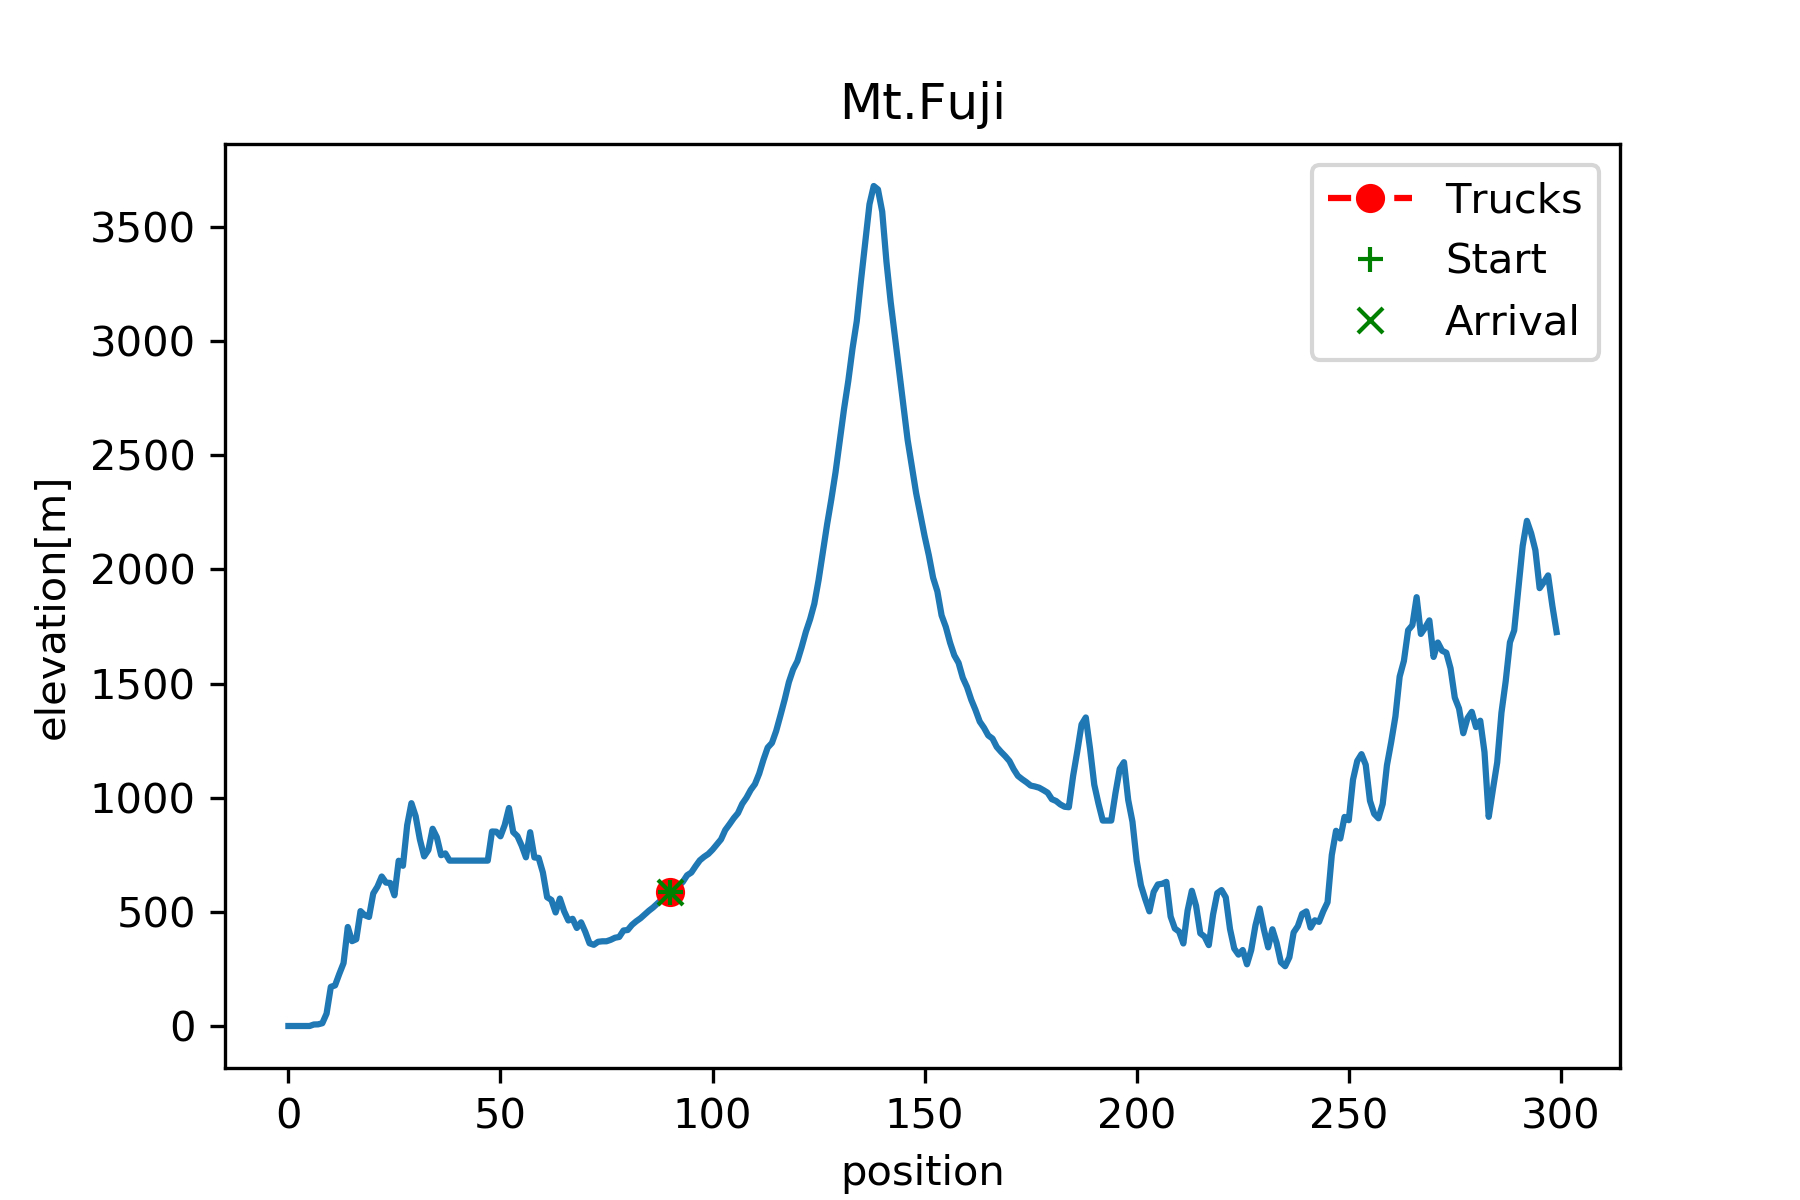

In [32]:
# alpha = 0.01

# これ入れないとちゃんと動かないことがある気がする
%matplotlib nbagg

fig = plt.figure(figsize=(6, 4), dpi=150)

ims = []
# 山
plt.title("Mt.Fuji") 
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.plot(fuji[:,0],fuji[:, 3]) 
flag_legend = True#凡例描画のフラグ

for i in fuji[:,0]:
    #print(i)
    position_x = going_down(int(i), 0.01)
    position_y = np.array([fuji[x, 3] for x in position_x])
    im1 = plt.plot(position_x, position_y,  "o--r", label = "Trucks")  # グラフにする
    im2 = plt.plot(position_x[0], position_y[0],  "+g", label = "Start")
    im3 = plt.plot(position_x[-1], position_y[-1],  "xg", label = "Arrival")
    if flag_legend:#一回のみ凡例を描画
        plt.legend()
        flag_legend = False
    ims.append(im1+im2+im3)#グラフを配列に追加

# 10枚のプロットを 100ms ごとに表示
ani = animation.ArtistAnimation(fig, ims, interval=100)
plt.show()

$ α $が0.01であると、局所解に捕まりやすいようである。

#### alphaが0.3の場合

スタート地点を除いた通過しうる点

<IPython.core.display.Javascript object>


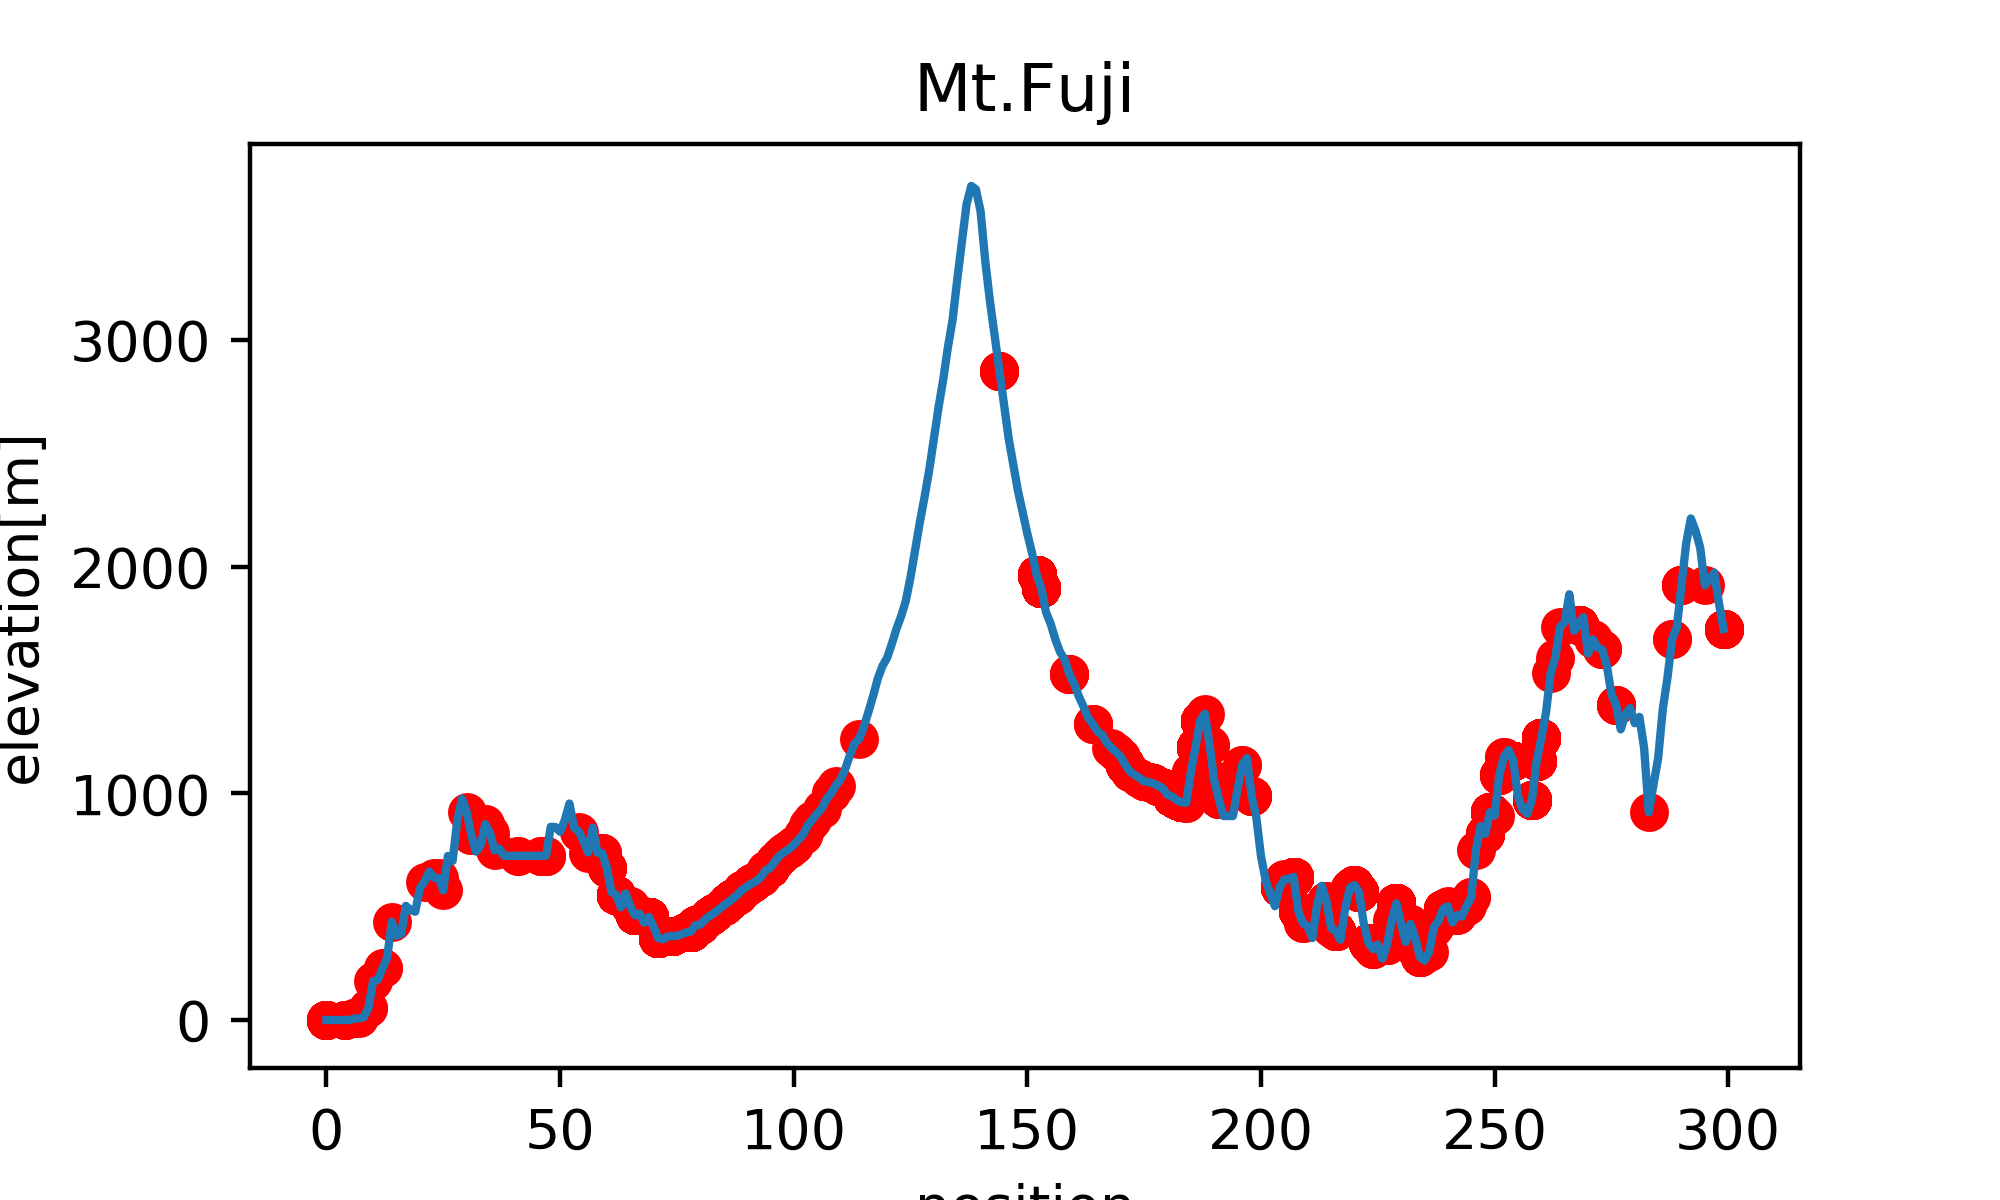

In [33]:
# alphaが0.3の場合
plt.figure(figsize=(5, 3), dpi=200)
plt.title("Mt.Fuji") 
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.plot(fuji[:,0],fuji[:, 3]) 

for i in fuji[:,0]:
    #print(i)
    position_x = going_down(int(i),0.3)[1:]
    position_y = np.array([fuji[x, 3] for x in position_x])
    plt.scatter(position_x, position_y, color="red") 
    
#plt.plot(position_x, position_y,  "o--r") 
plt.show()

Traceback (most recent call last):
  File "/Users/ryuji_sato/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 387, in process
    proxy(*args, **kwargs)
  File "/Users/ryuji_sato/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 227, in __call__
    return mtd(*args, **kwargs)
  File "/Users/ryuji_sato/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/animation.py", line 1499, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


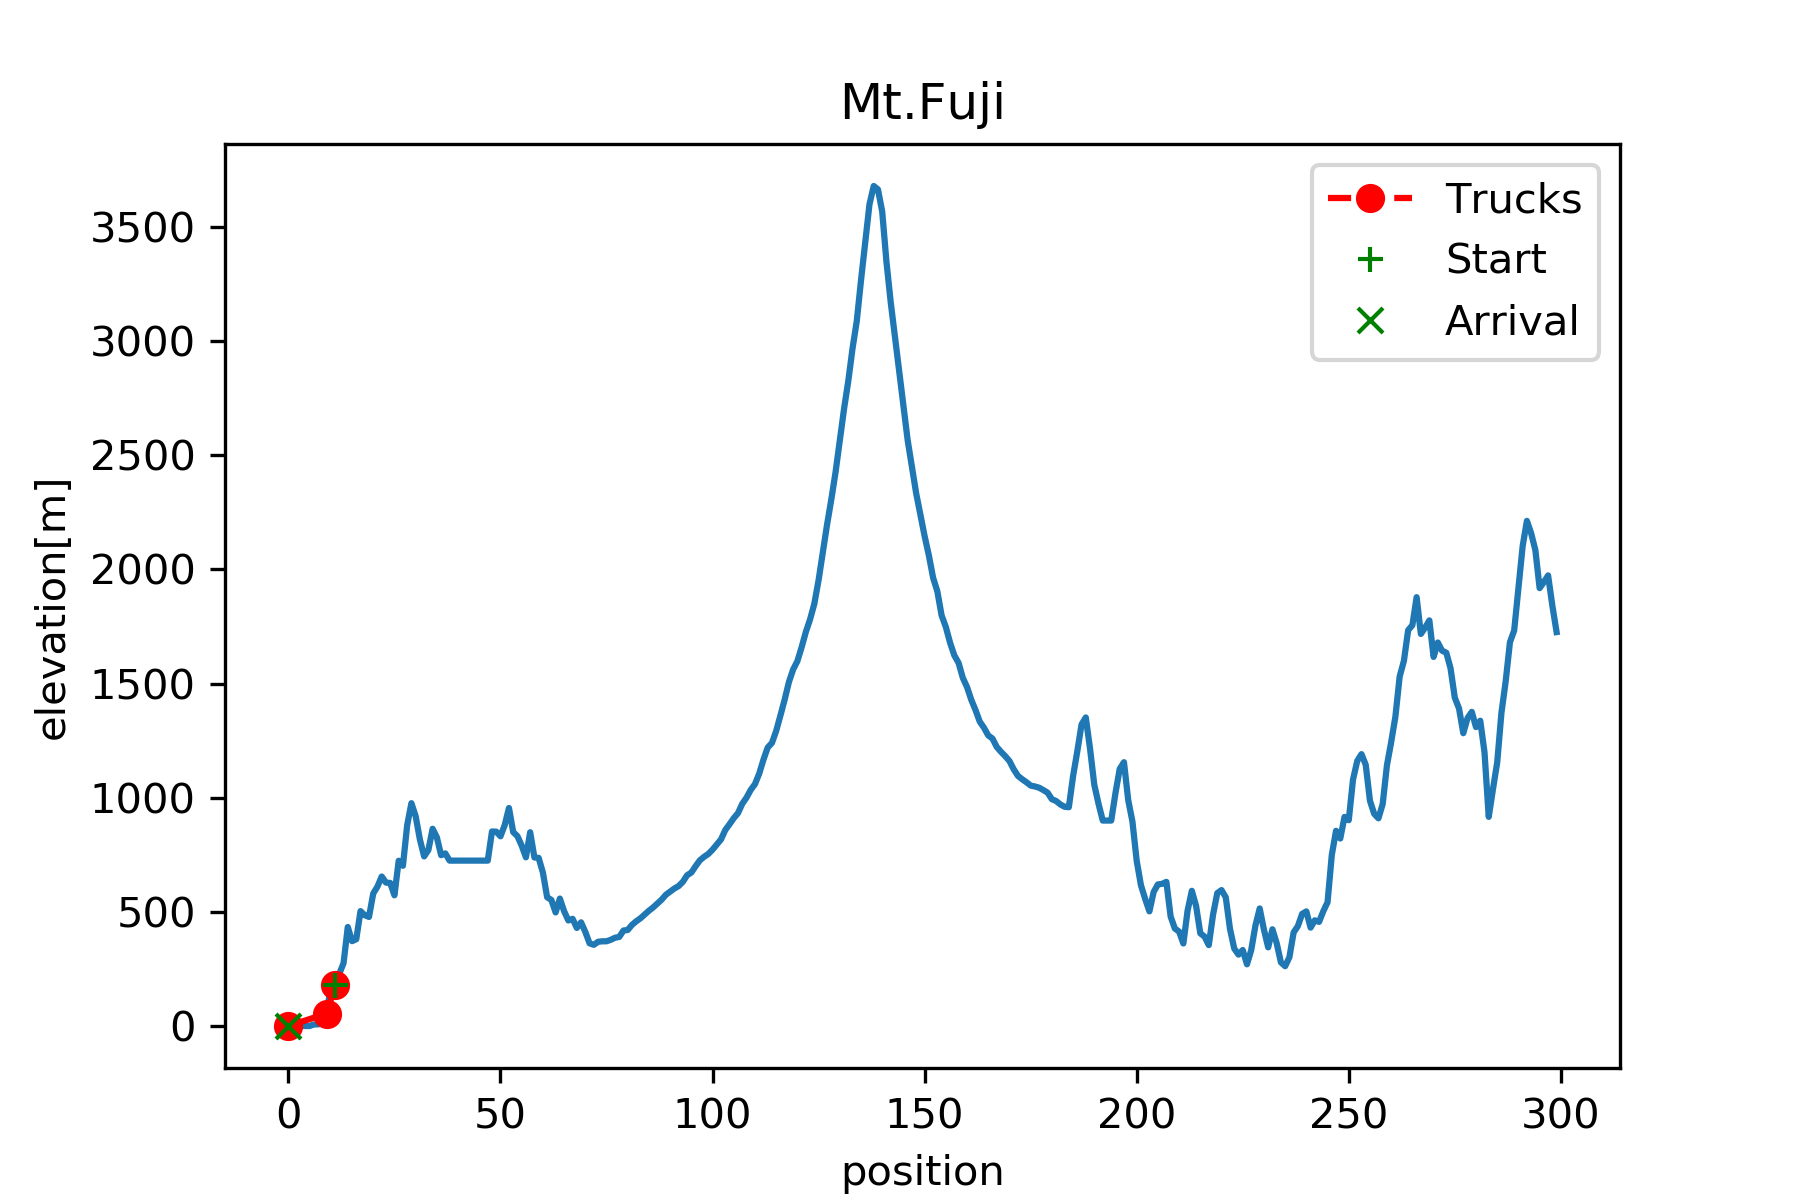

In [34]:
# alpha = 0.3

# これ入れないとちゃんと動かないことがある気がする
%matplotlib nbagg

fig = plt.figure(figsize=(6, 4), dpi=150)

ims = []
# 山
plt.title("Mt.Fuji") 
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.plot(fuji[:,0],fuji[:, 3]) 
flag_legend = True#凡例描画のフラグ

for i in fuji[:,0]:
    #print(i)
    position_x = going_down(int(i), 0.3)
    position_y = np.array([fuji[x, 3] for x in position_x])
    im1 = plt.plot(position_x, position_y,  "o--r", label = "Trucks")  # グラフにする
    im2 = plt.plot(position_x[0], position_y[0],  "+g", label = "Start")
    im3 = plt.plot(position_x[-1], position_y[-1],  "xg", label = "Arrival")
    if flag_legend:#一回のみ凡例を描画
        plt.legend()
        flag_legend = False
    ims.append(im1+im2+im3)#グラフを配列に追加

# 10枚のプロットを 100ms ごとに表示
ani = animation.ArtistAnimation(fig, ims, interval=100)
plt.show()


$ α $が0.3であると、山の頂上を越えた後、坂を遡りやすくなっているようである。  
勾配を「今いる地点の番号」と「今いる隣の地点の番号（今いる地点の番号-1）」の関係で求めており、グラフで言うと「今いる地点」のひとつ左の点しか評価していないことが影響している可能性がある。  

In [35]:
# 【問題2】ある地点の勾配を計算する関数を作成_right_ver

def fuji_slope_right(x):
    # 変化量deltaを求める
    # 最後の地点の場合、ひとつ前の地点と比較する
    if x == fuji[:, 0].max():  
        delta =  fuji[x] - fuji[x-1]
    else:
        delta =  fuji[x+1] - fuji[x]
    #print(delta)
    # 勾配slopeを求める
    slope = delta[3] / delta[0]
    return slope 

In [36]:
print("fuji_slope(131地点)「今いる地点の番号」と「今いる隣の地点の番号（今いる地点の番号-1）」から求めた勾配:{}".format(fuji_slope(131)))
print("fuji_slope_right(130地点)「今いる隣の地点の番号（今いる地点の番号-1）」と「今いる地点の番号」から求めた勾配:{}".format(fuji_slope_right(130)))

fuji_slope(131地点)「今いる地点の番号」と「今いる隣の地点の番号（今いる地点の番号-1）」から求めた勾配:139.69999999999982
fuji_slope_right(130地点)「今いる隣の地点の番号（今いる地点の番号-1）」と「今いる地点の番号」から求めた勾配:139.69999999999982


In [37]:
print("fuji_slope(0地点)「今いる地点の番号」と「今いる隣の地点の番号（今いる地点の番号-1）」から求めた勾配:{}".format(fuji_slope(0)))
print("fuji_slope(299地点)「今いる地点の番号」と「今いる隣の地点の番号（今いる地点の番号-1）」から求めた勾配:{}".format(fuji_slope(299)))
print("fuji_slope_right(0地点)「今いる隣の地点の番号（今いる地点の番号-1）」と「今いる地点の番号」から求めた勾配:{}".format(fuji_slope_right(0)))
print("fuji_slope_right(299地点)「今いる隣の地点の番号（今いる地点の番号-1）」と「今いる地点の番号」から求めた勾配:{}".format(fuji_slope_right(299)))

fuji_slope(0地点)「今いる地点の番号」と「今いる隣の地点の番号（今いる地点の番号-1）」から求めた勾配:0.0
fuji_slope(299地点)「今いる地点の番号」と「今いる隣の地点の番号（今いる地点の番号-1）」から求めた勾配:-115.55999999999995
fuji_slope_right(0地点)「今いる隣の地点の番号（今いる地点の番号-1）」と「今いる地点の番号」から求めた勾配:0.0
fuji_slope_right(299地点)「今いる隣の地点の番号（今いる地点の番号-1）」と「今いる地点の番号」から求めた勾配:-115.55999999999995


In [38]:
# 移動先の地点 = 今いる地点 - α ×今いる地点の勾配

def where_go_right(x, a=0.2):
    """
        移動先の地点 = 今いる地点 - α ×今いる地点の勾配
    """
    from decimal import Decimal, ROUND_HALF_UP
    where_next_pre = x - a*fuji_slope_right(x)
    if where_next_pre > fuji[:, 0].max():  # 地点番号が最大値を超えたら最大値にする
        where_next = int(fuji[:, 0].max())
    elif where_next_pre < fuji[:, 0].min():  # 地点番号が最小値より低かったら最小値にする
        where_next = int(fuji[:, 0].min())
    else:
        # roundより正確に丸める
        where_next = int(Decimal(str(where_next_pre)).quantize(Decimal('1.'), rounding=ROUND_HALF_UP))
    return where_next

In [39]:
#【問題4】山を下る関数を作成_right
# 山下さんと合作

def going_down_right(x=136, a=0.2):
    # 今いる地点
    where_now = np.array([x])
    # 移動先 最初
    where_next = where_go_right(where_now[-1], a)
    
    # 移動地点が同じ場合、繰り返しをやめる
    while True:
        if where_next in where_now:
               break
        #print(where_next)
        where_now = np.hstack((where_now , np.array(where_next)))
        where_next = where_go_right(where_now[-1], a)

    
    return where_now

<IPython.core.display.Javascript object>


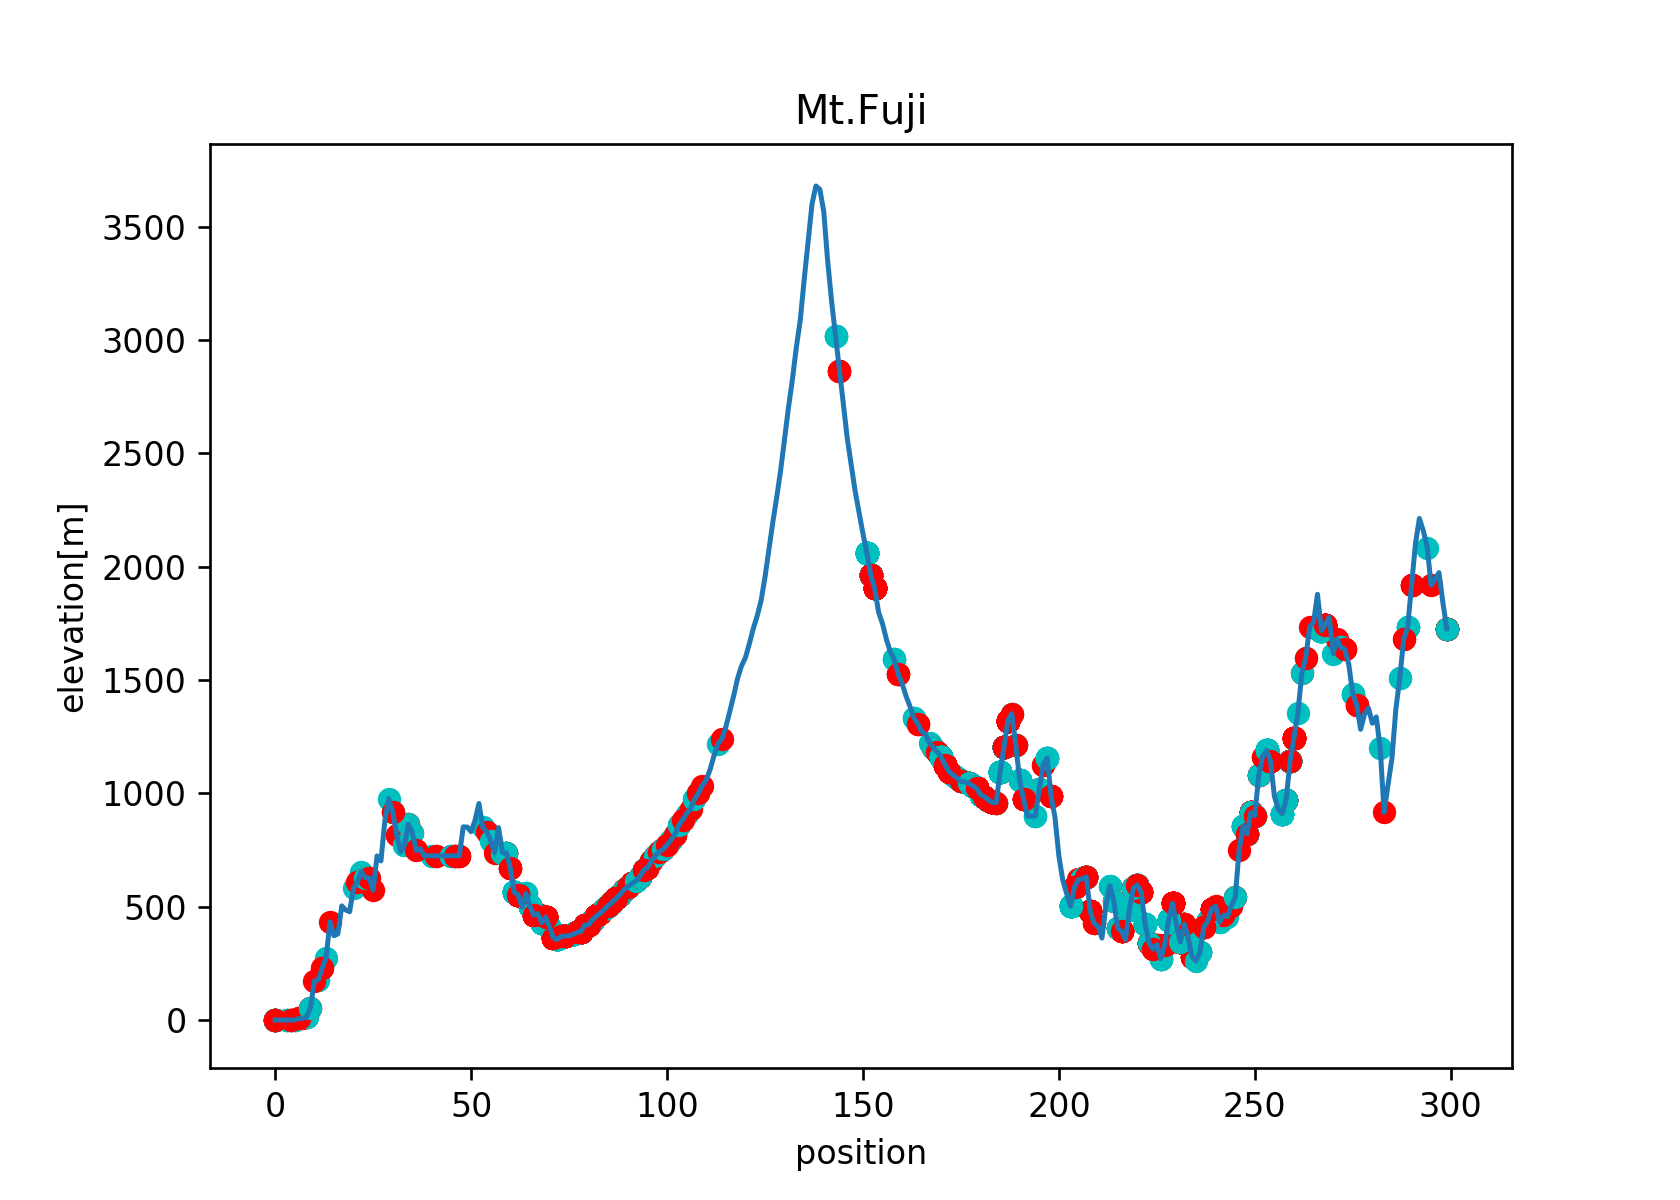

In [40]:
# alphaが0.3の場合
fig = plt.figure(figsize=(7, 5), dpi=120)
plt.title("Mt.Fuji") 
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.plot(fuji[:,0],fuji[:, 3]) 

for i in fuji[:,0]:
    # 前の地点との比較から勾配を求めた場合
    position_x = going_down(int(i),0.3)[1:]
    position_y = np.array([fuji[x, 3] for x in position_x])
    plt.scatter(position_x, position_y, color="red") 
    # 次の地点との比較から勾配を求めた場合
    position_x_right = going_down_right(int(i),0.3)[1:]
    position_y_right = np.array([fuji[x, 3] for x in position_x_right])
    plt.scatter(position_x_right, position_y_right, color="c")

#plt.plot(position_x, position_y,  "o--r") 
plt.show()

Traceback (most recent call last):
  File "/Users/ryuji_sato/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 387, in process
    proxy(*args, **kwargs)
  File "/Users/ryuji_sato/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 227, in __call__
    return mtd(*args, **kwargs)
  File "/Users/ryuji_sato/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/animation.py", line 1499, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


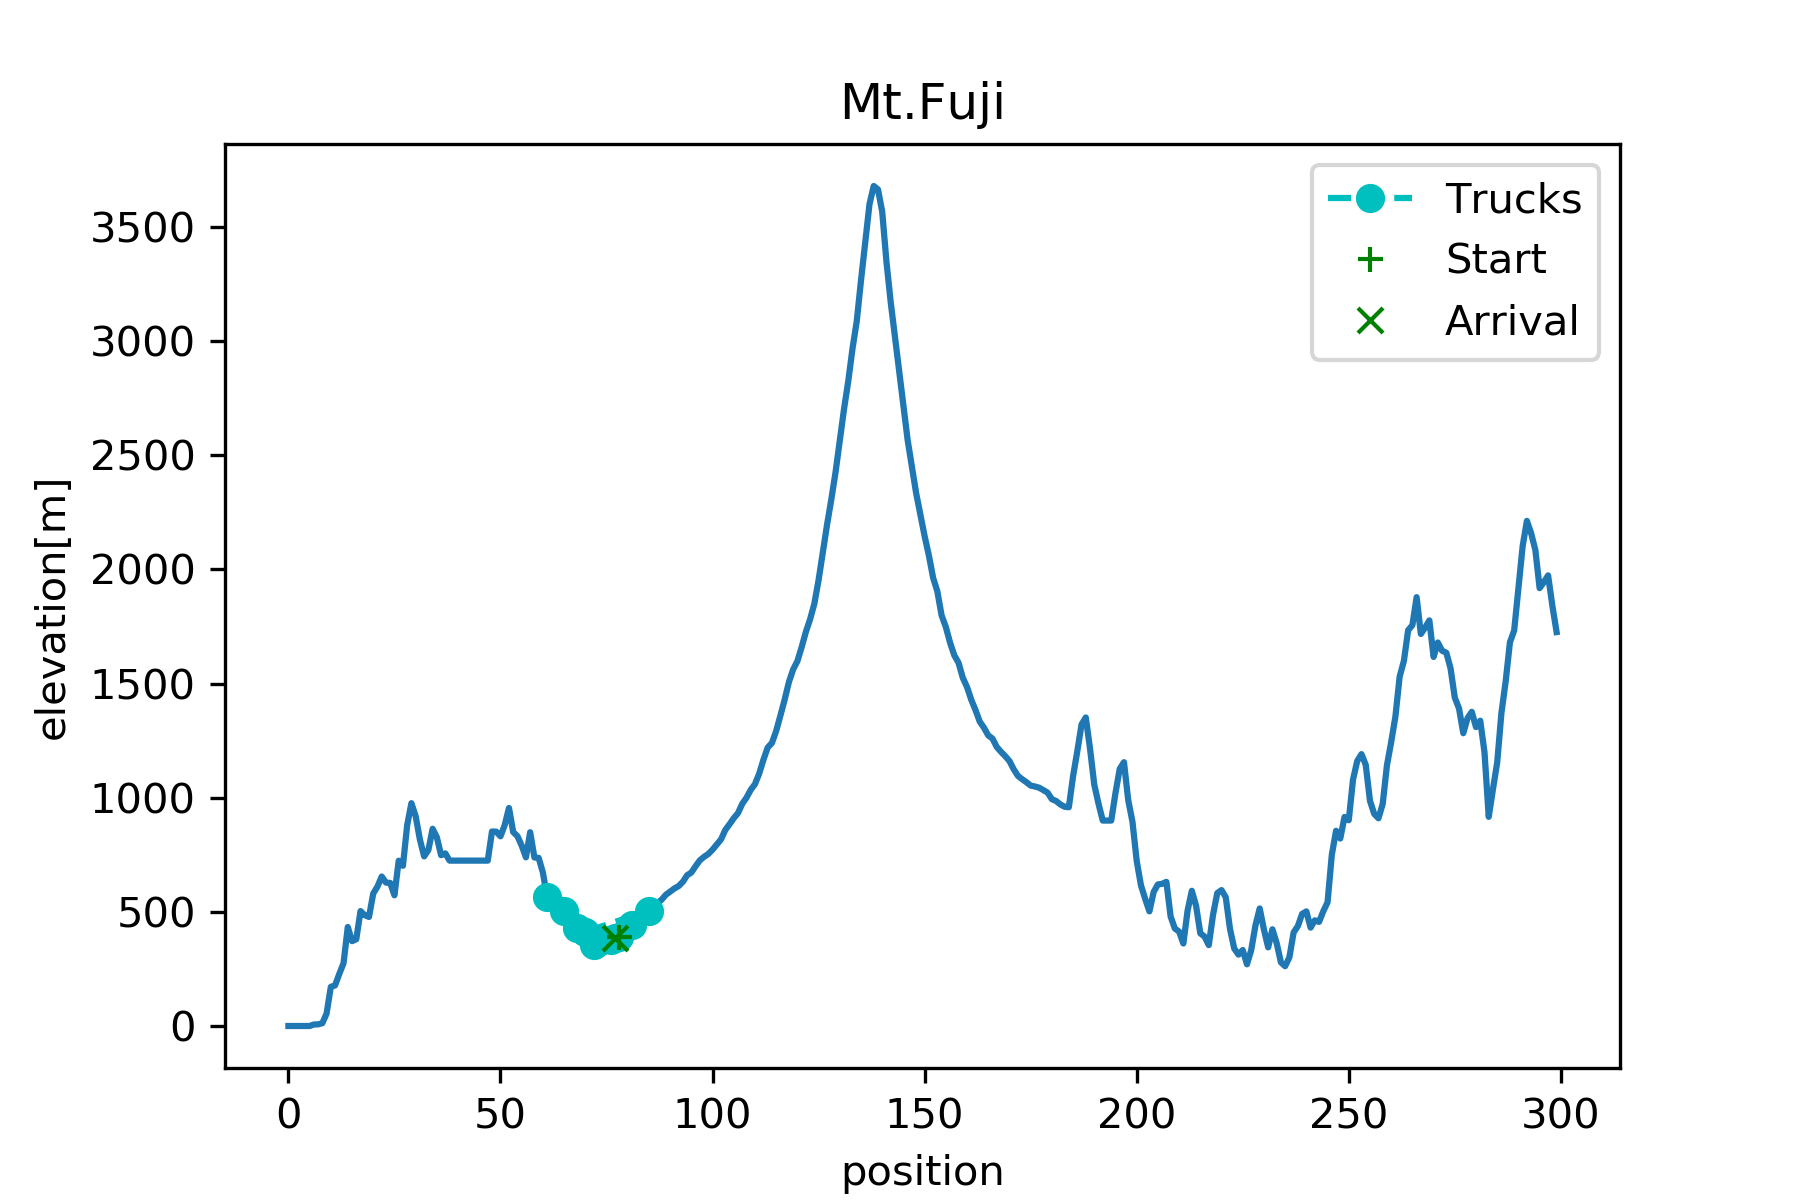

In [41]:
#right_ver
# alpha = 0.3 

# これ入れないとちゃんと動かないことがある気がする
%matplotlib nbagg

fig = plt.figure(figsize=(6, 4), dpi=150)

ims = []
# 山
plt.title("Mt.Fuji") 
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.plot(fuji[:,0],fuji[:, 3]) 
flag_legend = True#凡例描画のフラグ

for i in fuji[:,0]:
    #print(i)
    position_x = going_down_right(int(i), 0.3)
    position_y = np.array([fuji[x, 3] for x in position_x])
    im1 = plt.plot(position_x, position_y,  "o--c", label = "Trucks")  # グラフにする
    im2 = plt.plot(position_x[0], position_y[0],  "+g", label = "Start")
    im3 = plt.plot(position_x[-1], position_y[-1],  "xg", label = "Arrival")
    if flag_legend:#一回のみ凡例を描画
        plt.legend()
        flag_legend = False
    ims.append(im1+im2+im3)#グラフを配列に追加

# 10枚のプロットを 100ms ごとに表示
ani = animation.ArtistAnimation(fig, ims, interval=100)
plt.show()

地点200から地点250の連続した小さな丘に対する点の取り方は異なるようである。しかし、(
各スタート地点のルート、到達地点を比較していないが、)
勾配の取り方（今いる地点の前か後ろか）による大きな差はないようである。  
移動先の地点は「移動先の地点 = 今いる地点 - α ×今いる地点の勾配」で決まるため、どれだけの地点、坂を遡るかは移動先が上り坂であるか否かは関係ないようである。

地点200から地点250に関する考察は後回しにする。

#### alphaが0.5の場合

Traceback (most recent call last):
  File "/Users/ryuji_sato/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 387, in process
    proxy(*args, **kwargs)
  File "/Users/ryuji_sato/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 227, in __call__
    return mtd(*args, **kwargs)
  File "/Users/ryuji_sato/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/animation.py", line 1499, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


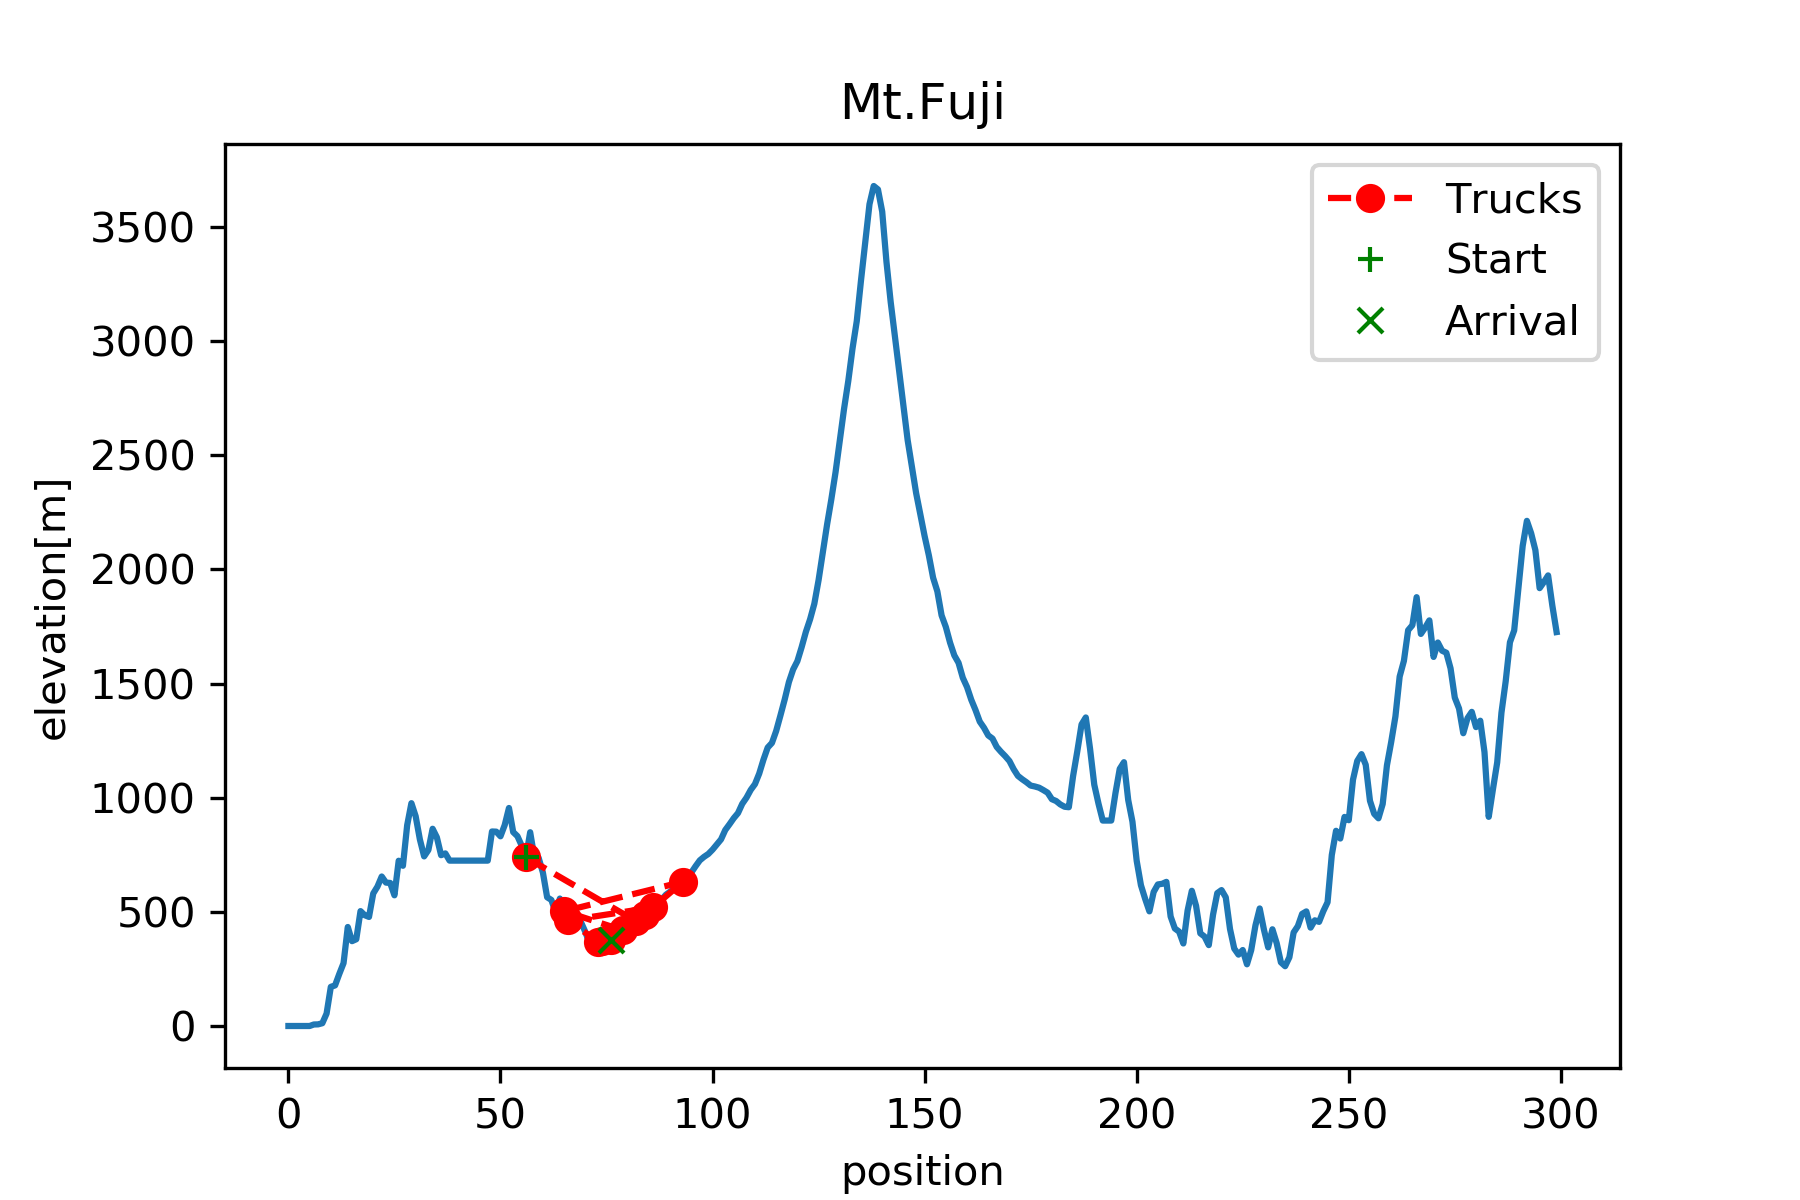

In [42]:
# alpha = 0.5

# これ入れないとちゃんと動かないことがある気がする
%matplotlib nbagg

fig = plt.figure(figsize=(6, 4), dpi=150)

ims = []
# 山
plt.title("Mt.Fuji") 
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.plot(fuji[:,0],fuji[:, 3]) 
flag_legend = True#凡例描画のフラグ

for i in fuji[:,0]:
    #print(i)
    position_x = going_down(int(i), 0.5)
    position_y = np.array([fuji[x, 3] for x in position_x])
    im1 = plt.plot(position_x, position_y,  "o--r", label = "Trucks")  # グラフにする
    im2 = plt.plot(position_x[0], position_y[0],  "+g", label = "Start")
    im3 = plt.plot(position_x[-1], position_y[-1],  "xg", label = "Arrival")
    if flag_legend:#一回のみ凡例を描画
        plt.legend()
        flag_legend = False
    ims.append(im1+im2+im3)#グラフを配列に追加

# 10枚のプロットを 100ms ごとに表示
ani = animation.ArtistAnimation(fig, ims, interval=100)
plt.show()

勾配への依存が大きくなったようである。

#### alphaが-0.2の場合

Traceback (most recent call last):
  File "/Users/ryuji_sato/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 387, in process
    proxy(*args, **kwargs)
  File "/Users/ryuji_sato/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 227, in __call__
    return mtd(*args, **kwargs)
  File "/Users/ryuji_sato/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/animation.py", line 1499, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


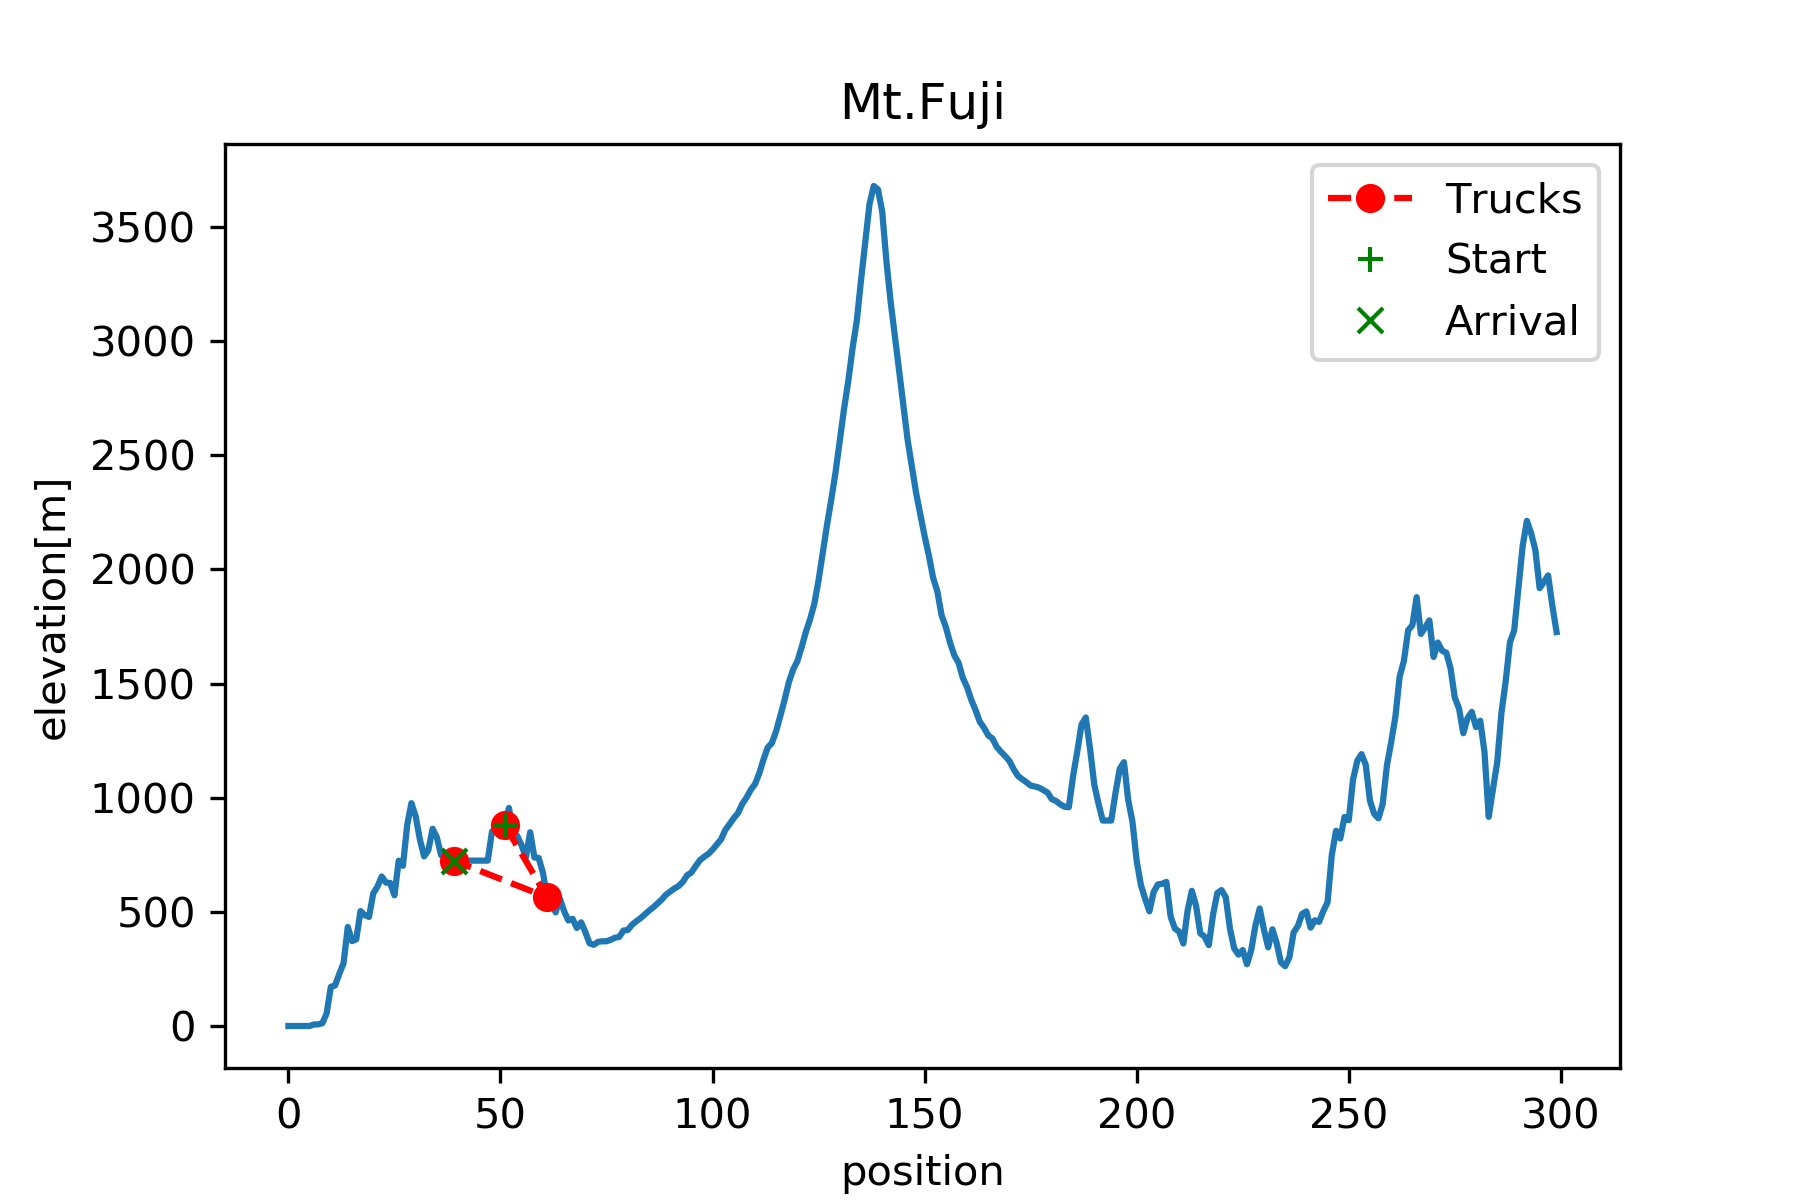

In [43]:
# alpha = -0.2

# これ入れないとちゃんと動かないことがある気がする
%matplotlib nbagg

fig = plt.figure(figsize=(6, 4), dpi=150)

ims = []
# 山
plt.title("Mt.Fuji") 
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.plot(fuji[:,0],fuji[:, 3]) 
flag_legend = True#凡例描画のフラグ

for i in fuji[:,0]:
    #print(i)
    position_x = going_down(int(i), -0.2)
    position_y = np.array([fuji[x, 3] for x in position_x])
    im1 = plt.plot(position_x, position_y,  "o--r", label = "Trucks")  # グラフにする
    im2 = plt.plot(position_x[0], position_y[0],  "+g", label = "Start")
    im3 = plt.plot(position_x[-1], position_y[-1],  "xg", label = "Arrival")
    if flag_legend:#一回のみ凡例を描画
        plt.legend()
        flag_legend = False
    ims.append(im1+im2+im3)#グラフを配列に追加

# 10枚のプロットを 100ms ごとに表示
ani = animation.ArtistAnimation(fig, ims, interval=100)
plt.show()

勾配が低いほど、移動距離が短くなる。  
勾配が高いほど、坂を登る方向へ大きく移動する。

#### alphaが5.0の場合

Traceback (most recent call last):
  File "/Users/ryuji_sato/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 387, in process
    proxy(*args, **kwargs)
  File "/Users/ryuji_sato/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 227, in __call__
    return mtd(*args, **kwargs)
  File "/Users/ryuji_sato/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/animation.py", line 1499, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


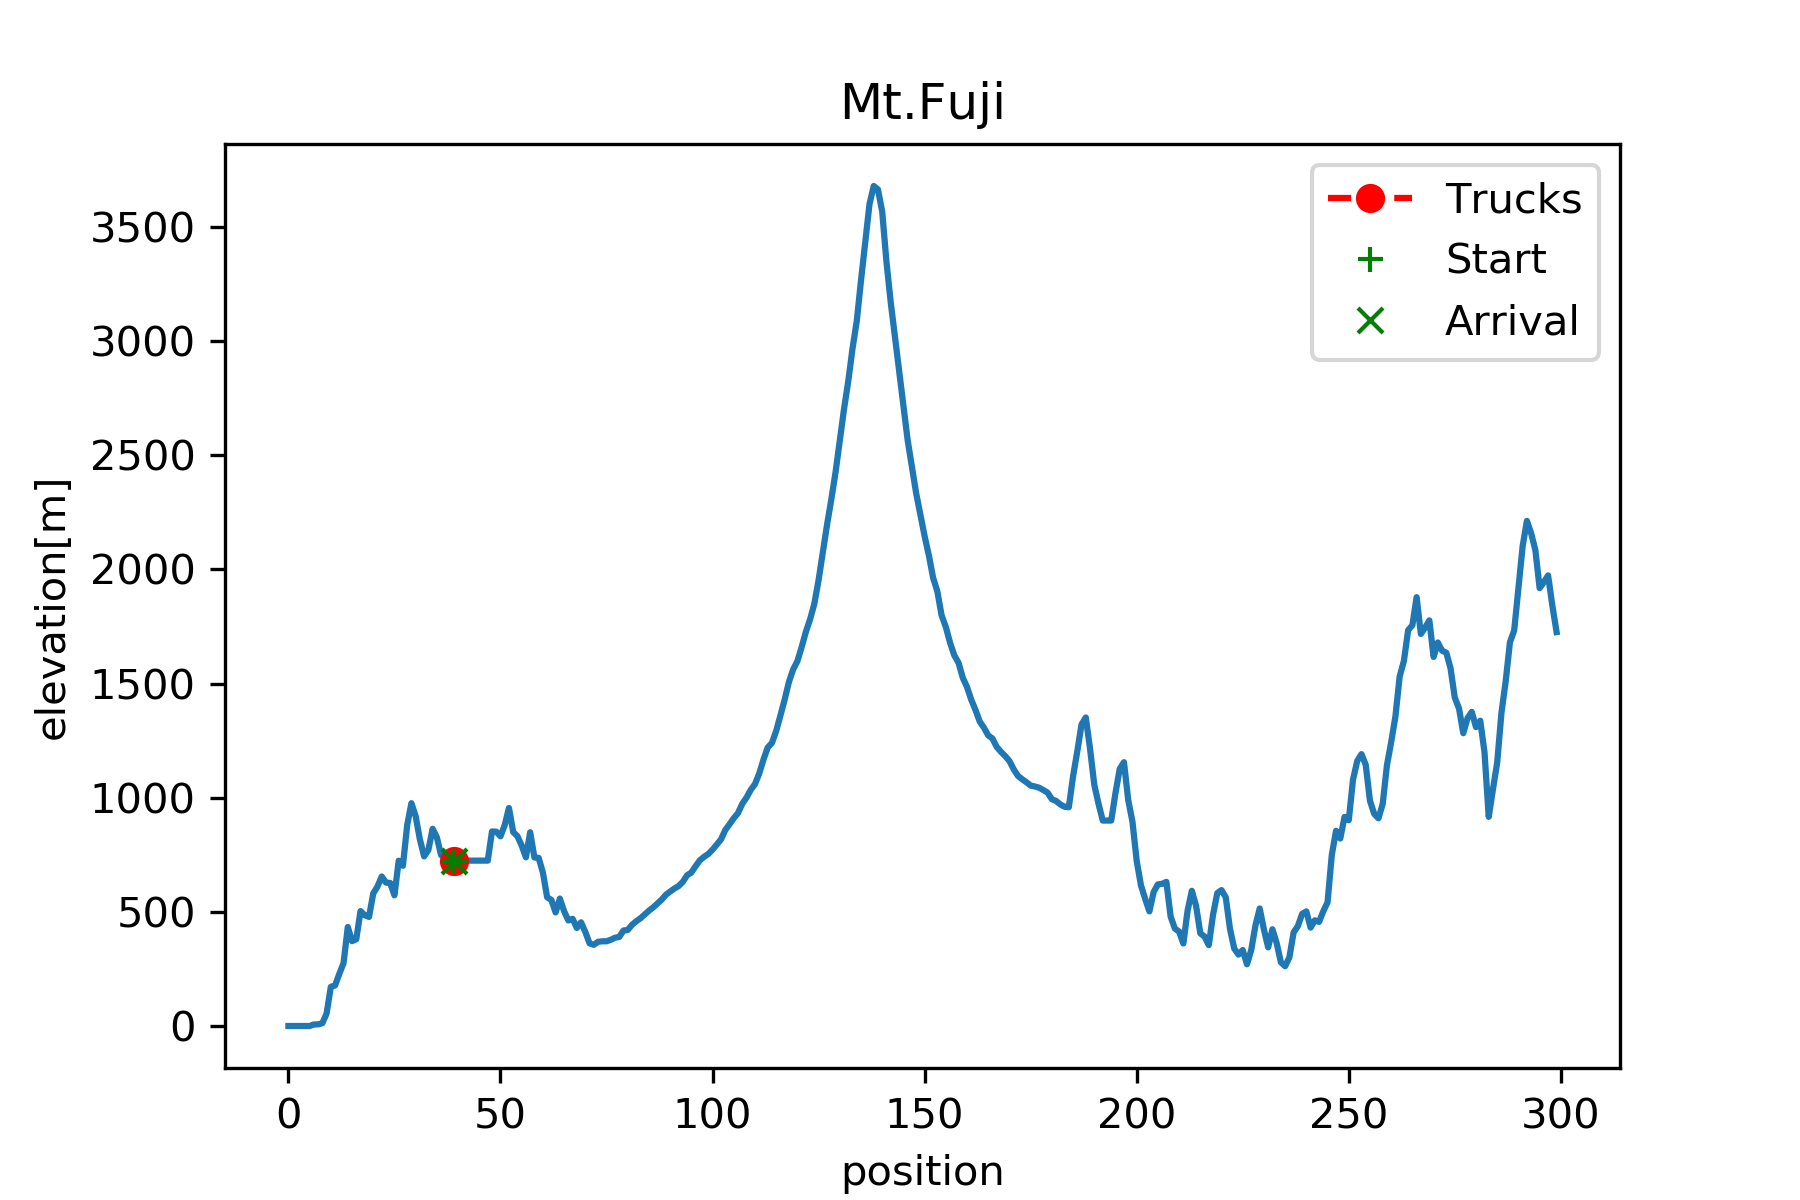

In [44]:
# alpha = 5.0

# これ入れないとちゃんと動かないことがある気がする
%matplotlib nbagg

fig = plt.figure(figsize=(6, 4), dpi=150)

ims = []
# 山
plt.title("Mt.Fuji") 
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.plot(fuji[:,0],fuji[:, 3]) 
flag_legend = True#凡例描画のフラグ

for i in fuji[:,0]:
    #print(i)
    position_x = going_down(int(i), 5.0)
    position_y = np.array([fuji[x, 3] for x in position_x])
    im1 = plt.plot(position_x, position_y,  "o--r", label = "Trucks")  # グラフにする
    im2 = plt.plot(position_x[0], position_y[0],  "+g", label = "Start")
    im3 = plt.plot(position_x[-1], position_y[-1],  "xg", label = "Arrival")
    if flag_legend:#一回のみ凡例を描画
        plt.legend()
        flag_legend = False
    ims.append(im1+im2+im3)#グラフを配列に追加

# 10枚のプロットを 100ms ごとに表示
ani = animation.ArtistAnimation(fig, ims, interval=100)
plt.show()

一定以上の勾配であると、行き先は横軸の最小、あるいは最大の地点になる。　

#### alphaが-5.0の場合

Traceback (most recent call last):
  File "/Users/ryuji_sato/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 387, in process
    proxy(*args, **kwargs)
  File "/Users/ryuji_sato/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 227, in __call__
    return mtd(*args, **kwargs)
  File "/Users/ryuji_sato/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/animation.py", line 1499, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


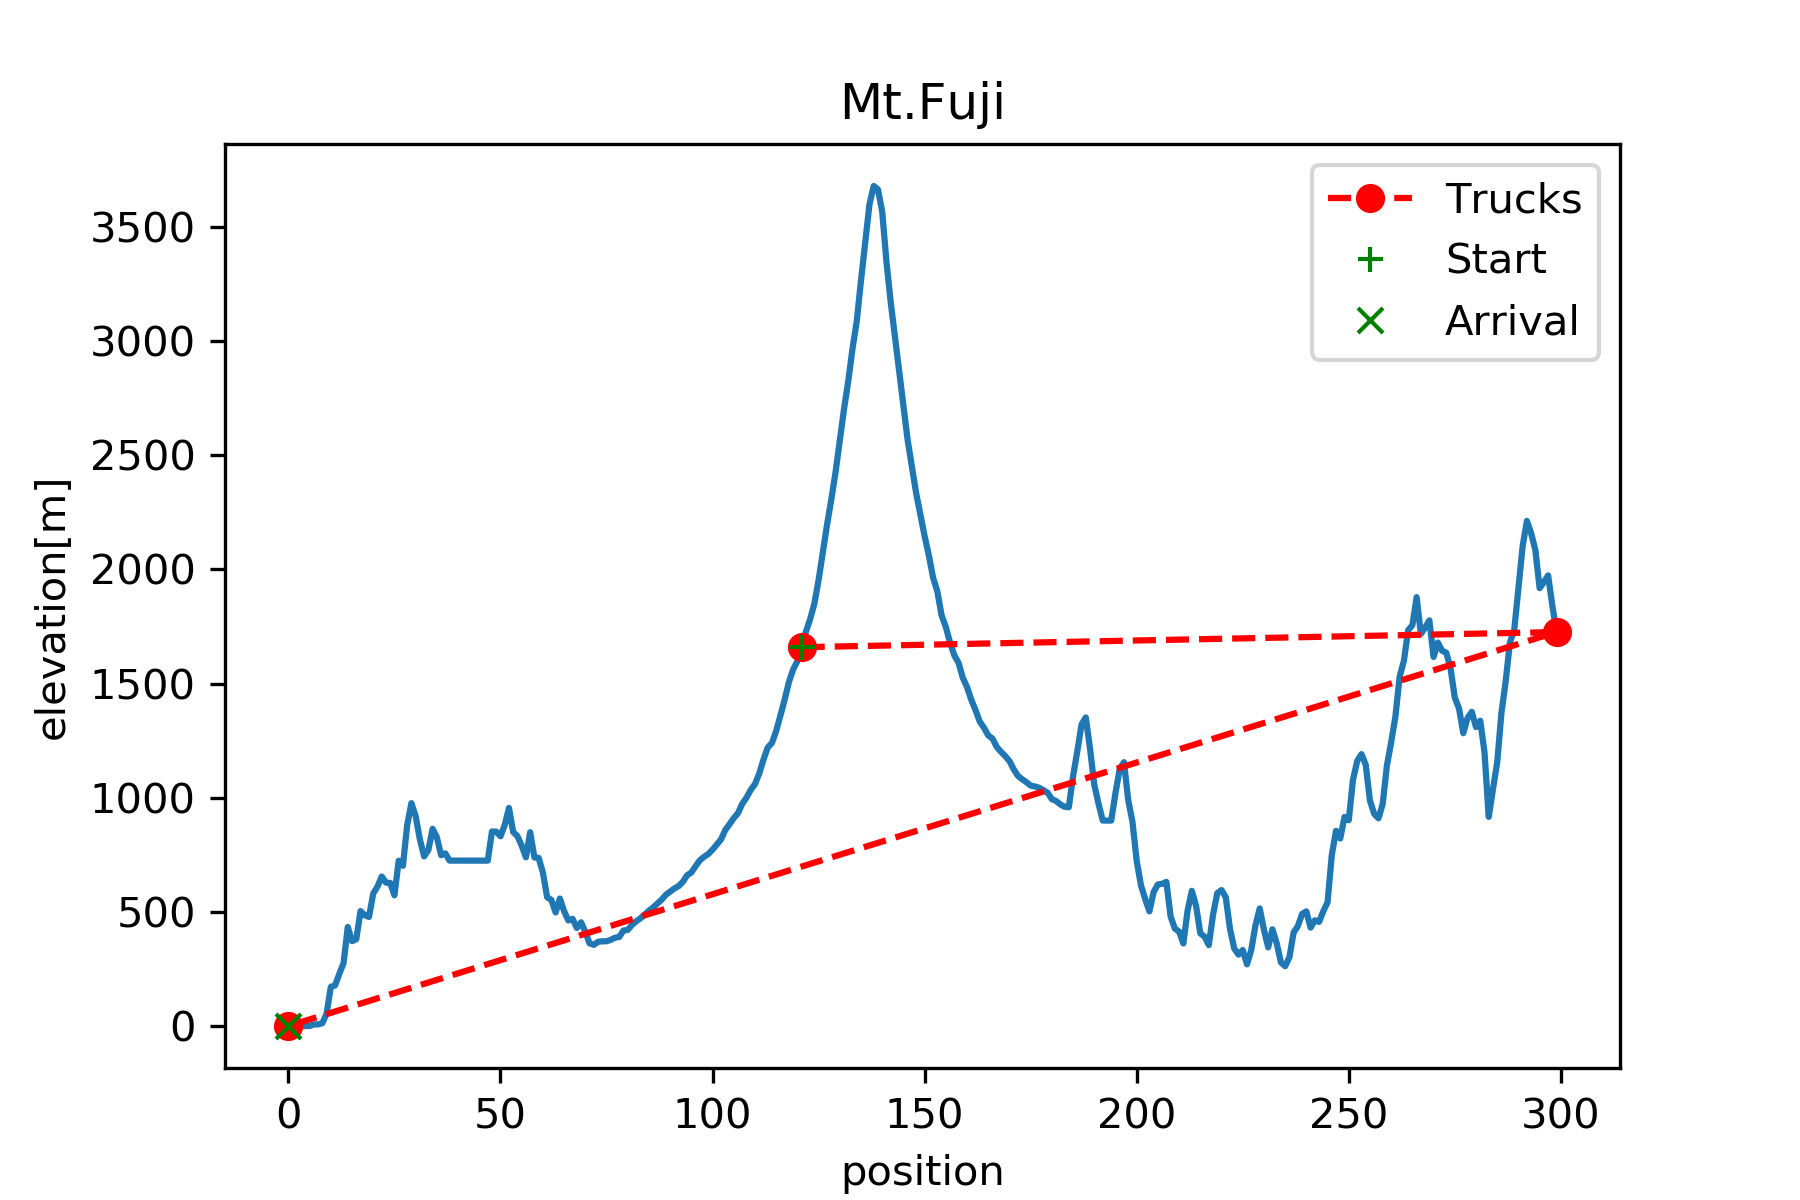

In [45]:
# alpha = -5.0

# これ入れないとちゃんと動かないことがある気がする
%matplotlib nbagg

fig = plt.figure(figsize=(6, 4), dpi=150)

ims = []
# 山
plt.title("Mt.Fuji") 
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.plot(fuji[:,0],fuji[:, 3]) 
flag_legend = True#凡例描画のフラグ

for i in fuji[:,0]:
    #print(i)
    position_x = going_down(int(i), -5.0)
    position_y = np.array([fuji[x, 3] for x in position_x])
    im1 = plt.plot(position_x, position_y,  "o--r", label = "Trucks")  # グラフにする
    im2 = plt.plot(position_x[0], position_y[0],  "+g", label = "Start")
    im3 = plt.plot(position_x[-1], position_y[-1],  "xg", label = "Arrival")
    if flag_legend:#一回のみ凡例を描画
        plt.legend()
        flag_legend = False
    ims.append(im1+im2+im3)#グラフを配列に追加

# 10枚のプロットを 100ms ごとに表示
ani = animation.ArtistAnimation(fig, ims, interval=100)
plt.show()

勾配が0でない限り、地点0に到達するようである。

#### 自分課題
・地点0の勾配の対処の仕方を考えたい。  →OK:地点0に関しては、次の地点との関係から勾配を計算  
・計算結果を表にまとめたい。  
・到達地点について、ヒストグラムも表示させたい。  
・データセットに緯度、経度、地点０からの距離のデータがるので、それらも活用したい。  
・3Dにプロットしたい。  
・それらから、到達地点を求めたい。  
・また、最適な$ a $の値を求めたい。←最適ってどういう意味？ゴールをどこにおくか考える。  
・もっと綺麗にノートをまとめたい。コードの実行結果を分かりやすくしたい。  
・他者にコードを理解してもらいやすいようにコメント、変数名に注意したい。
・勾配のグラフを作成する。